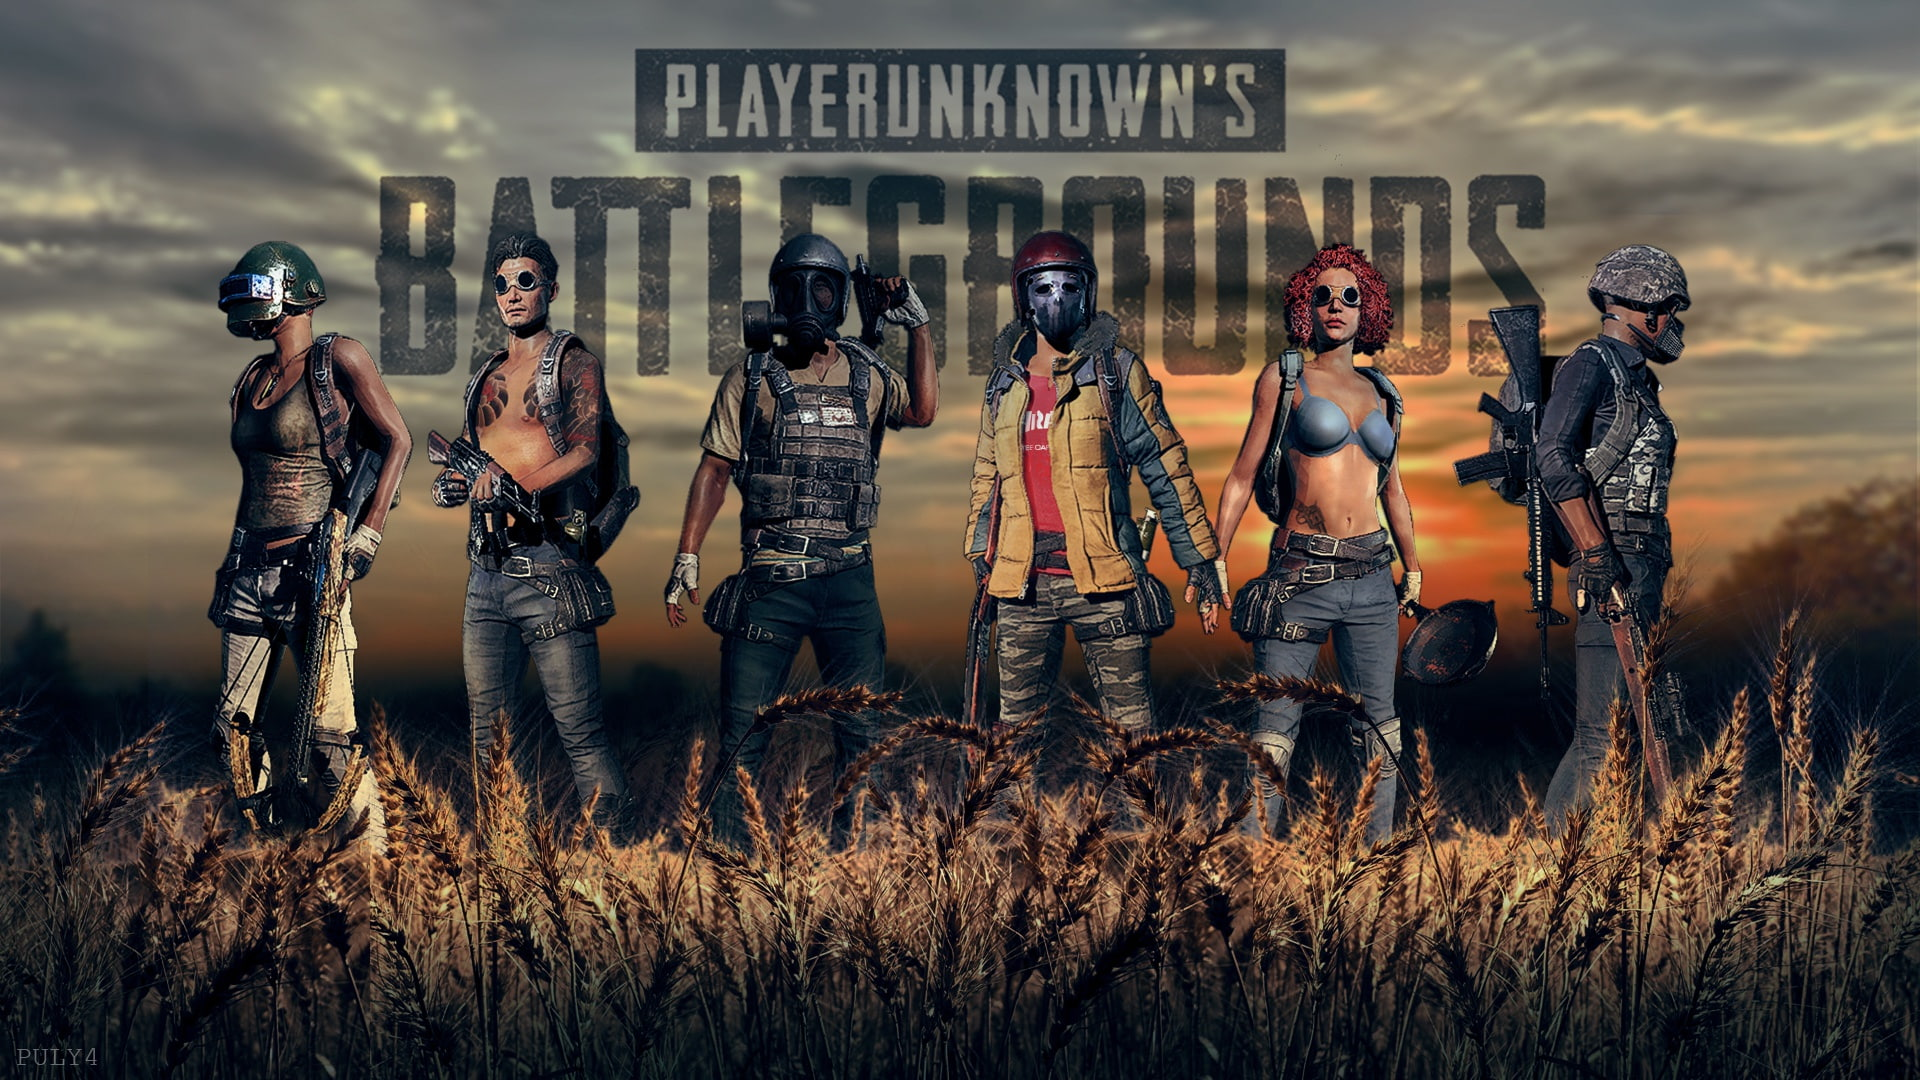

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

Loading the Data

In [2]:
def reduce_mem_usage(df):
  """ iterate through all the columns of a dataframe and modify the data type to reduce memory usage """

  start_mem = df.memory_usage().sum() / 1024**2

  for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
      c_min = df[col].min()
      c_max = df[col].max()

      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64)
        else:
          if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            df[col] = df[col].astype(np.float32)
          else:
            df[col] = df[col].astype(np.float64)

      #end_mem = df.memory_usage().sum / 1024**2

      #print('Memory usage of dataframe is {:.2f} MB (Decreased vy {:1f}%)'.format(
      #    start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
      return df

##### Data Dictionary

- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

Loading CSV files to DataFrame

In [3]:
%%time
df = pd.read_csv("S:\GitHub Projects\PUBG\Datasets\PUBG_Game_Prediction_data.csv")
reduce_mem_usage(df)

CPU times: total: 9.55 s
Wall time: 11.2 s


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


##### Exploratory Data Analysis (EDA)

In [5]:
df.shape

(4446966, 29)

Unique count of ID, GroupID, MatchID

In [6]:
for i in ['Id', 'groupId', 'matchId']:
  print(f"Unique [{i}] count: ", df[i].nunique())

Unique [Id] count:  4446966
Unique [groupId] count:  2026745
Unique [matchId] count:  47965


Exploring Different Match type

In [7]:
df['matchType'].value_counts()

matchType
squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: count, dtype: int64

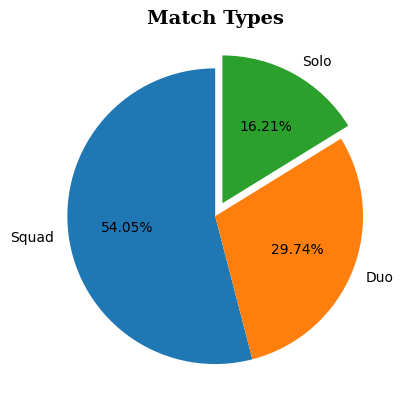

In [8]:
mapper = lambda x: 'Solo' if ('solo' in x) else 'Duo' if ('duo' in x) or ('crash' in x) else 'Squad'
df_copy = df.copy()

df_copy['matchType'] = df_copy['matchType'].apply(mapper)

plt.pie(df_copy['matchType'].value_counts(), autopct = '%.2f%%', explode = [0,0,0.1], labels = df_copy['matchType'].unique(),
        startangle = 90)
plt.title('Match Types', fontsize = 14, fontweight = 'bold', fontfamily = 'serif');

Player Analysis



*   Players in match and group

During a game, 100 players join the same server, so in the case of Duo's the maximum teams are 50 and in rge case of Squad's the maximum teams are 25.



In [9]:
def mergeList(list_1, list_2):
  return list(itertools.product(list_1, list_2))

match = df_copy.groupby(['matchType', 'matchId']).size().to_frame('players in match')
match.head(3)

players in match
matchType matchId                         
Duo       0003b92987589e               100
          0006eb8c17708d                93
          00086c74bb4efc                98

In [10]:
group = df_copy.groupby(['matchType', 'matchId', 'groupId']).size().to_frame('players in group')
group.head()

players in group
matchType matchId        groupId                         
Duo       0003b92987589e 024136db14272c                 2
                         058b63035c6c08                 2
                         0c7fbc2742917b                 2
                         1add3b8ce32302                 2
                         1ed2da8e6c07b5                 2

In [11]:
pd.concat([match.groupby('matchType').describe()[mergeList(['players in match'], ['min', 'mean', 'max'])],
           group.groupby('matchType').describe()[mergeList(['players in group'], ['min', 'mean', 'max'])]
           ], axis =1)

players in match                   players in group                
                       min       mean    max              min      mean   max
matchType                                                                    
Duo                    7.0  92.985658  100.0              1.0  2.050456  72.0
Solo                   1.0  89.031872  100.0              1.0  1.039249  64.0
Squad                  5.0  93.723193  100.0              1.0  3.492575  74.0

In [12]:
print(group['players in group'].nlargest(5))

del group

matchType  matchId         groupId       
Squad      b30f3d87189aa6  14d6b54cdec6bc    74
Duo        3e029737889ce9  b8275198faa03b    72
Solo       41a634f62f86b7  128b07271aa012    64
Duo        7e93ce71ac6f61  7385e5fe214021    49
Squad      3c2531adf5b942  e52a2e6ca30474    36
Name: players in group, dtype: int64


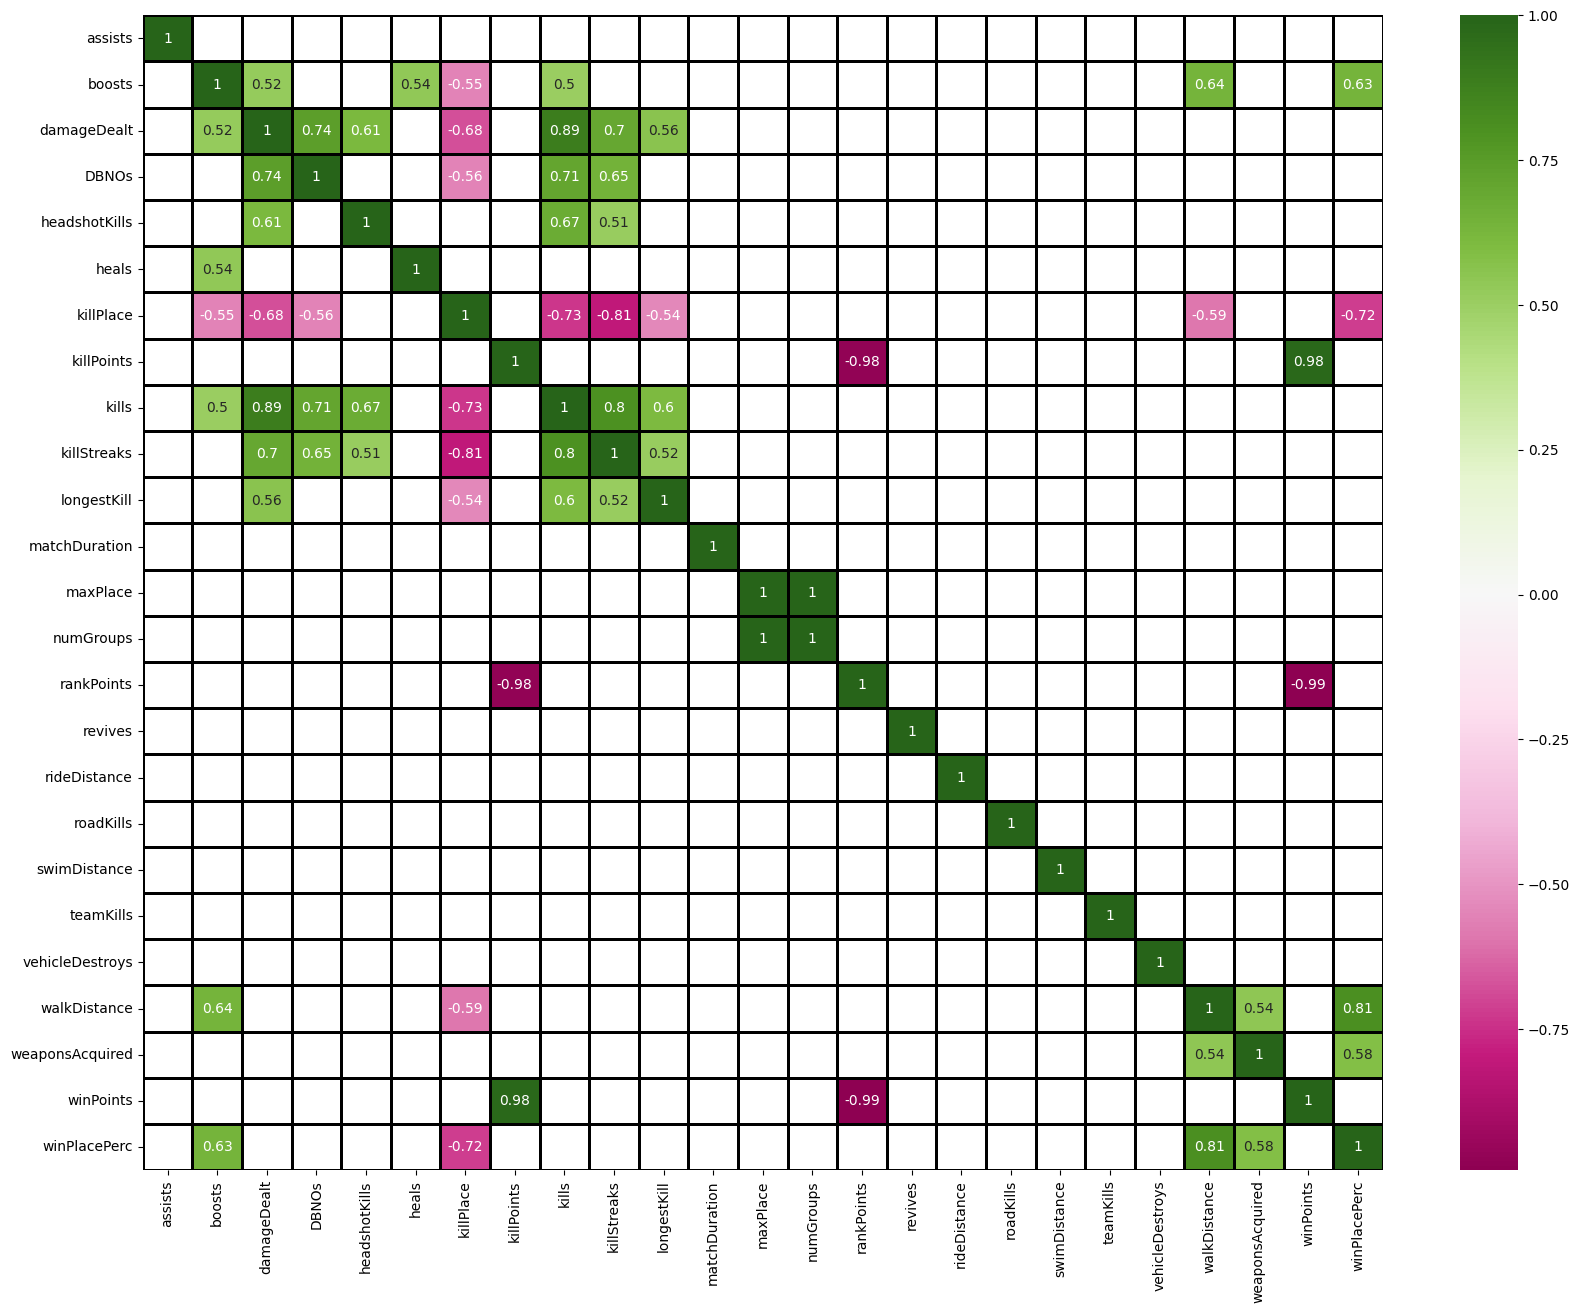

In [13]:
df_corr = df_copy.select_dtypes('number').corr()
plt.figure(figsize = (20,15))
sns.heatmap(df_corr[(df_corr <= -0.5) | (df_corr >= 0.5)], annot= True, cmap = 'PiYG', linewidths=1, linecolor='black');

del df_corr

###### Feature Engineering

In [14]:
print("On an avaerage a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(df_copy['kills'].mean(), df_copy['kills'].quantile(0.99), df_copy['kills'].max()))

On an avaerage a person kills 0.9248 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 72.


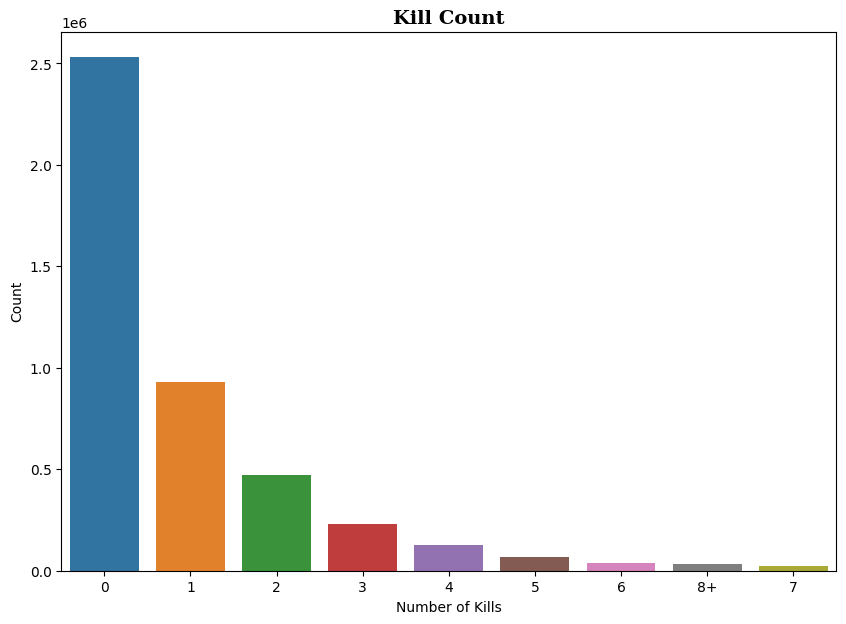

In [15]:
df_copy_1 = df_copy.copy()

df_copy_1.loc[df_copy_1['kills'] > df_copy_1['kills'].quantile(0.99)] = '8+'

plt.figure(figsize = (10,7))
sns.barplot(x = df_copy_1['kills'].value_counts().index,
            y = df_copy_1['kills'].value_counts().values)
plt.title('Kill Count', fontsize = 14, fontweight = 'bold', fontfamily = 'serif')
plt.xlabel('Number of Kills')
plt.ylabel('Count');

It seems that most of the people cannot even made a single kill. But atleast deal with some damage.

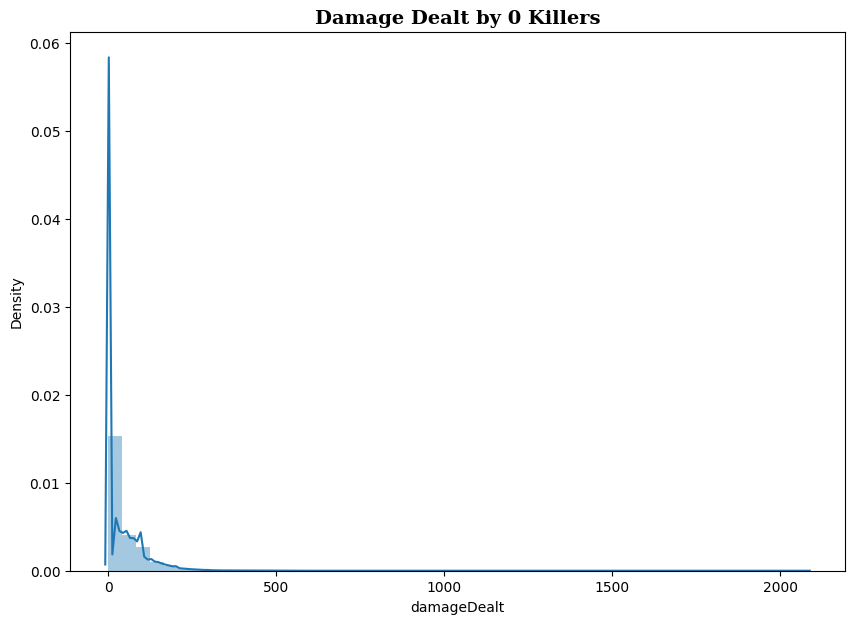

In [16]:
df_0_kills = df_copy_1[df_copy_1['kills'] == 0]

plt.figure(figsize = (10,7))
sns.distplot(df_0_kills['damageDealt'])
plt.title('Damage Dealt by 0 Killers', fontsize = 14, fontweight = 'bold', fontfamily = 'serif') ;

del df_0_kills

In [17]:
df_copy[(df_copy_1['kills'] == 0) & (df_copy_1['winPlacePerc'] == 1)]['kills'].value_counts()

kills
0    16666
Name: count, dtype: int64

In [18]:
df_copy[(df_copy_1['damageDealt'] == 0) & (df_copy_1['winPlacePerc'] == 1)]['damageDealt'].value_counts()

damageDealt
0.0    4770
Name: count, dtype: int64

* A total of 16666 players have won the game without even a single kill
* A total of 4770 players have won the game without even dealing damae

Effect of Killing on winning Percentage

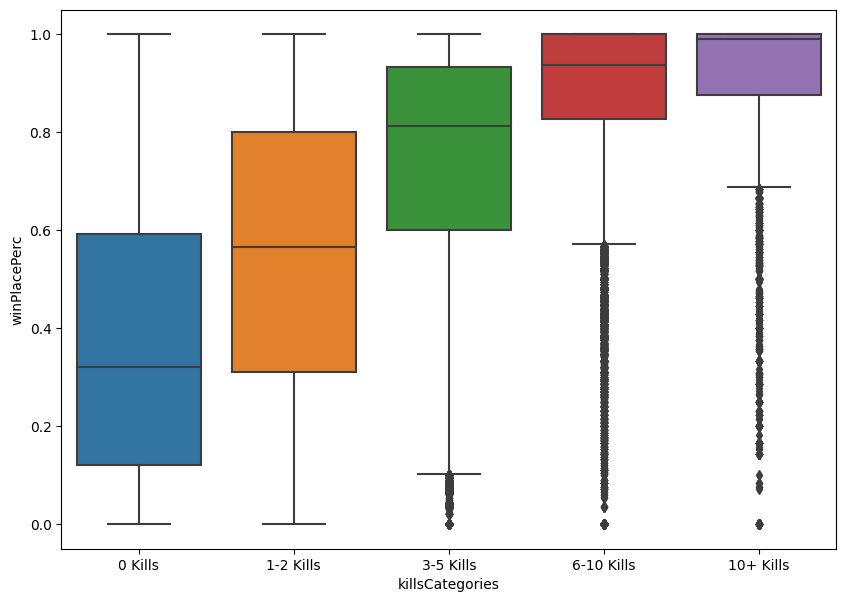

In [19]:
df_copy_2 = df_copy.copy()

df_copy_2['killsCategories'] = pd.cut(df_copy_2['kills'], bins = [-1, 0, 2, 5, 10, 60],
                                      labels = ['0 Kills', '1-2 Kills', '3-5 Kills', '6-10 Kills', '10+ Kills'])

plt.figure(figsize = (10,7))
sns.boxplot(x= df_copy_2['killsCategories'], y= df_copy_2['winPlacePerc']) ;

* Kills has high correlation with the winning percentage

In [20]:
del df_copy_2

Analysing Running

In [21]:
df_copy[(df_copy['walkDistance'] == 0)]['walkDistance'].value_counts()

walkDistance
0.0    99603
Name: count, dtype: int64

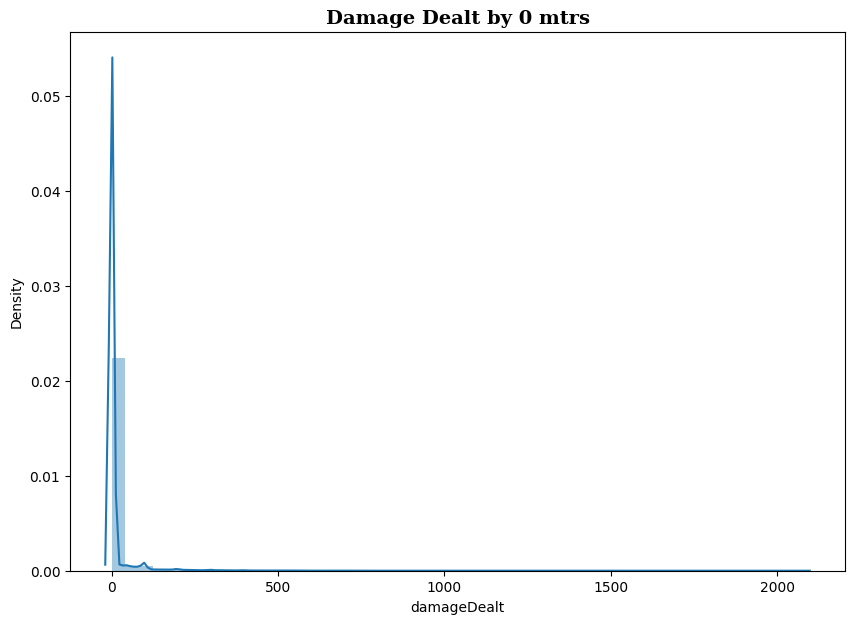

In [22]:
df_0_mtrs = df_copy_1[df_copy_1['walkDistance'] == 0]

plt.figure(figsize = (10,7))
sns.distplot(df_0_mtrs['damageDealt'])
plt.title('Damage Dealt by 0 mtrs', fontsize = 14, fontweight = 'bold', fontfamily = 'serif') ;

del df_0_mtrs
del df_copy_1

<Figure size 1500x700 with 0 Axes>

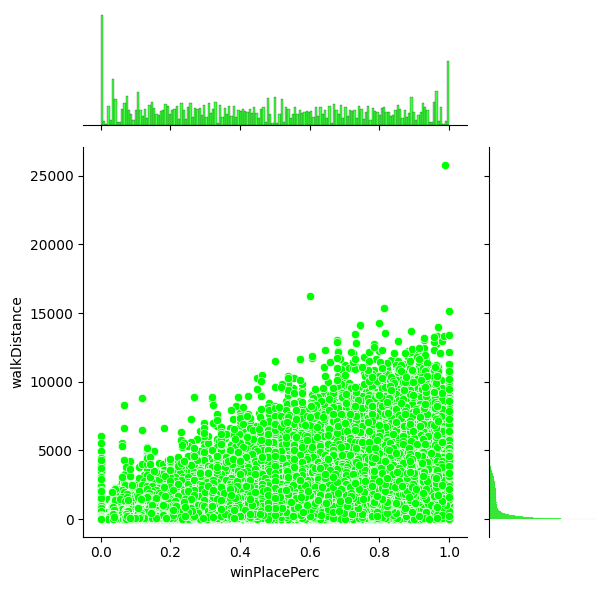

In [23]:
plt.figure(figsize = (15,7))
sns.jointplot(y= df_copy['walkDistance'], x= df_copy['winPlacePerc'], ratio= 3, color = 'lime') ;

* 99603 players walked 0 mtrs
* Walking has high correlation with the winning percentage

**Analysing Riding**

In [24]:
print("On an avaerage a person drives {:.1f} mtrs, 99% of people have drived {} or less, while the maximum ride ever recorded is {}.".format(df_copy['rideDistance'].mean(), df_copy['rideDistance'].quantile(0.99), df_copy['rideDistance'].max()))

On an avaerage a person drives 606.1 mtrs, 99% of people have drived 6966.0 or less, while the maximum ride ever recorded is 40710.0.


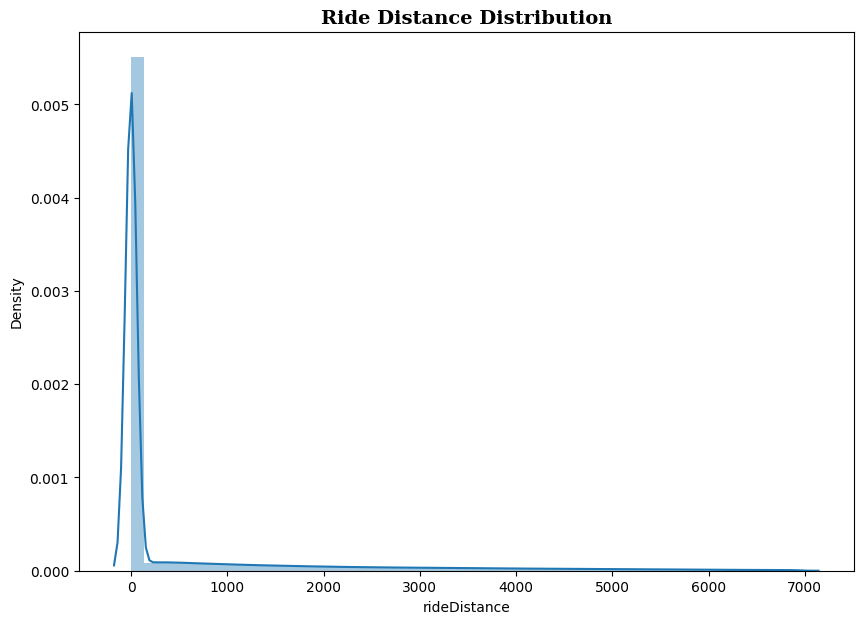

In [25]:
df_ride = df_copy.copy()

df_ride = df_ride[df_ride['rideDistance'] < df_ride['rideDistance'].quantile(0.99)]

plt.figure(figsize = (10,7))
sns.distplot(df_ride['rideDistance'])
plt.title('Ride Distance Distribution', fontsize = 14, fontweight = 'bold', fontfamily = 'serif') ;

del df_ride

In [26]:
print("{} players ({:.2f}%) drived for 0 mtrs. This means that they like trekking more than riding.".format(df_copy[df_copy['rideDistance'] == 0].shape[0],
                                                                                                           df_copy[df_copy['rideDistance'] == 0].shape[0]/df_copy.shape[0] * 100))

3309429 players (74.42%) drived for 0 mtrs. This means that they like trekking more than riding.


In [27]:
#plt.figure(figsize = (15,7))
#sns.jointplot(y= df_copy['rideDistance'], x= df_copy['winPlacePerc'], ratio= 3, color = 'y') ;

* 3309429 players (74.42%) drived for 0 mtrs. This means that they like trekking more than riding
* On an avaerage a person drives 606.1 mtrs, 99% of people have drived 6966.0 or less, while the maximum ride ever recorded is 40710.0.
* Joint plot indicates there is a small correlation between driving and winning

**Theoratically if a player is able to destroy the vehicle he/she is skilled. Lets check if this theory is correct.**

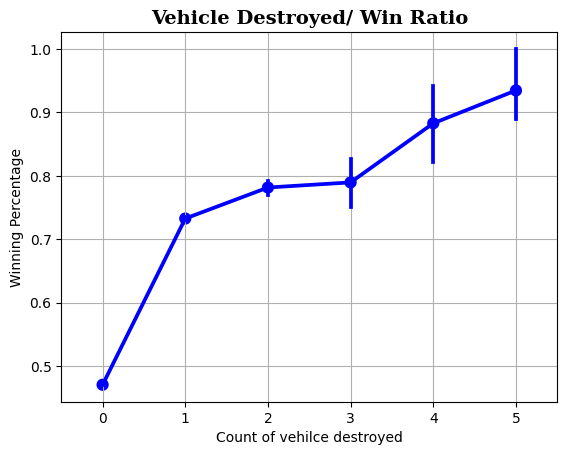

In [28]:
sns.pointplot(x = df_copy['vehicleDestroys'], y =  df_copy['winPlacePerc'], color = 'blue')
plt.xlabel('Count of vehilce destroyed')
plt.ylabel('Winning Percentage')
plt.title('Vehicle Destroyed/ Win Ratio', fontsize = 14, fontweight = 'bold', fontfamily = 'serif')
plt.grid();

* Destroying more than 1 vehicle represents the skillfulness of a player, hence the player who can destroy more vehicles has the higher chances of winning

**Analysing Healing & Boosting**

In [29]:
print("On an avaerage a person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(df_copy['heals'].mean(), df_copy['heals'].quantile(0.99), df_copy['heals'].max()))

print("On an avaerage a person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(df_copy['boosts'].mean(), df_copy['boosts'].quantile(0.99), df_copy['boosts'].max()))

On an avaerage a person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
On an avaerage a person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


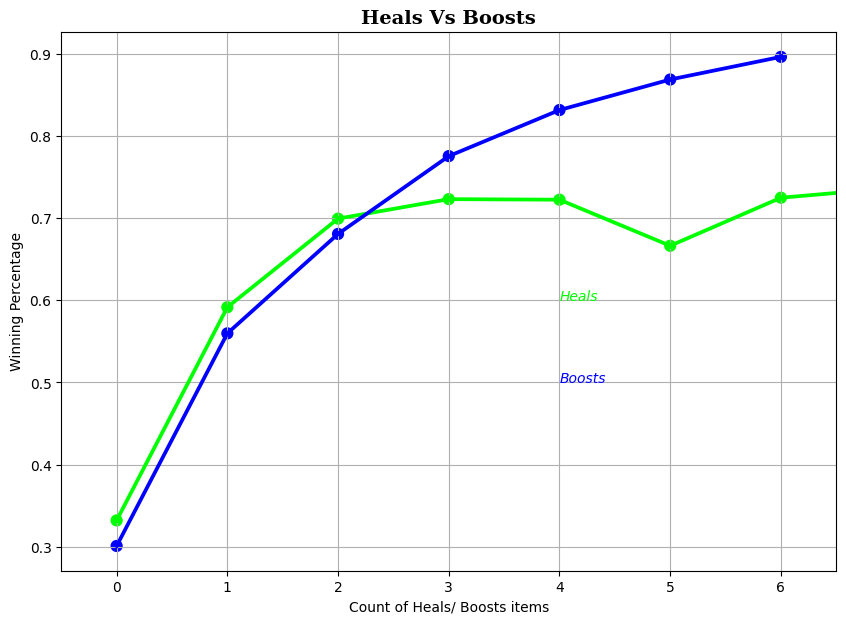

In [30]:
df_heal = df_copy.copy()

df_heal = df_heal[df_heal['heals'] < df_heal['heals'].quantile(0.99)]
df_heal = df_heal[df_heal['boosts'] < df_heal['boosts'].quantile(0.99)]


plt.figure(figsize = (10,7))
sns.pointplot(x = df_heal['heals'], y =  df_heal['winPlacePerc'], color = 'lime')
plt.text(4,0.6, 'Heals', color='lime', fontsize= 10, style = 'italic')
sns.pointplot(x = df_heal['boosts'], y =  df_heal['winPlacePerc'], color = 'blue')
plt.text(4,0.5, 'Boosts', color='blue', fontsize= 10, style = 'italic')
plt.xlabel('Count of Heals/ Boosts items')
plt.ylabel('Winning Percentage')
plt.title('Heals Vs Boosts', fontsize = 14, fontweight = 'bold', fontfamily = 'serif')
plt.grid();

del df_heal



*   On an avaerage a person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
* On an avaerage a person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.
*   Both healing & boosting have a high correlation with winning, however boosts matter more.



**Effect of Killing in different Game types: Solo, Duos and Squad on Winning Percentage**

In [31]:
solos = df_copy[df_copy['numGroups']>50]  # Solo game played by more than 50 different groups
duos =  df_copy[(df_copy['numGroups']>25) & (df_copy['numGroups']<=50)]  # Duo game can consist of a maximum of 50 groups (50*2 = 100)
squads =  df_copy[df_copy['numGroups']<=25]  # Squad consist of a maximum of 25 groups (25*4 = 100)

print("{} of games ({:.2f}%) are solo, {} of games ({:.2f}%) are duo and {} of games ({:.2f}%) are squad games".format(
    len(solos), len(solos)/len(df_copy)*100,
    len(duos), len(duos)/len(df_copy)*100,
    len(squads), len(squads)/len(df_copy)*100
))

del solos, duos, squads

709111 of games (15.95%) are solo, 3295326 of games (74.10%) are duo and 442529 of games (9.95%) are squad games


##### Data Cleaning

**Finding the fraudsters (Outlier Detection & Removal)**

In [32]:
# Dropping the records where target variable is not present
df_copy[df_copy['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [33]:
df_copy.drop(df_copy[df_copy['winPlacePerc'].isnull()].index, inplace = True)

df_copy.shape

(4446965, 29)

**Anomalies in Killing: Aim Hacks**

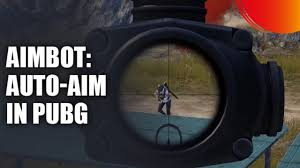

In [34]:
# Engineering a new feature _total_distance
df_copy['_total_distance'] = df_copy['rideDistance'] + df_copy['walkDistance'] + df_copy['swimDistance']

In [35]:
# Engineering a _headshot_rate feature --- headshots made per kill
df_copy['_headshot_rate'] = df_copy['headshotKills'] / df_copy['kills']
df_copy['_headshot_rate'] = df_copy['_headshot_rate'].fillna(0)

In [36]:
# Defining some functions for graphs, we will be needing a lot of countplot and distplot

def show_countplot(column):
  plt.figure(figsize=(15,7))
  sns.countplot(data = df_copy, x = column).set_title(column)
  plt.show()

def show_distplot(column):
  plt.figure(figsize=(15,7))
  sns.distplot(df_copy[column], bins=50).set_title(column)
  plt.show()

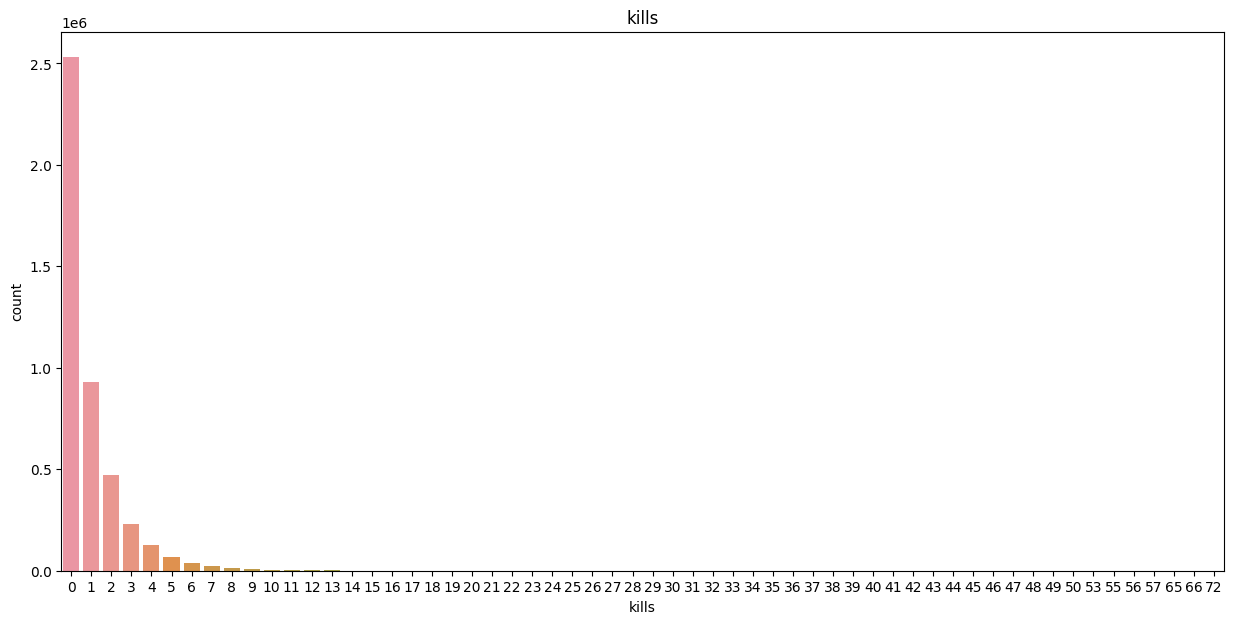

In [37]:
show_countplot('kills')

In [38]:
# Is it even possible to kill more than 40 people by acquiring more than 55 weapons and maintaining a total distance of less than 100m?

df_copy[(df_copy['kills'] >= 40) & (df_copy['weaponsAcquired'] > 55) & (df_copy['_total_distance'] < 100.0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.0,0,0,23.71,61,0,0.7000,23.71,0.250000
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,0,0.0,0,0,24.27,56,0,1.0000,24.27,0.087719
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,0.0,0,0,85.55,66,0,1.0000,85.55,0.127273
1378200,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,...,0,0.0,0,0,46.71,72,0,0.7778,46.71,0.121951


In [39]:
# Is it possible to kill more than 40 people without using any heals?

df_copy[(df_copy['kills'] >= 40) & (df_copy['heals'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,0.0,1,0,718.3,16,1500,1.0,718.3,0.952381
2105633,770c02791306c4,48ca6706a90e10,6ee2c835176181,8,0,4272.0,40,34,0,1,...,0,0.0,0,0,80.4,21,0,1.0,80.4,0.790698
2316123,dbc81aa64a7e3d,c50fe5c54e8bb6,5d58307bae9b50,8,0,4106.0,31,3,0,1,...,0,0.0,0,0,1282.0,22,0,1.0,1282.0,0.075000
2601666,436d1530e9eb00,5c974c2bb9d9f0,fe7043ee6221c8,5,0,4347.0,0,31,0,1,...,0,0.0,0,0,134.3,36,0,1.0,134.3,0.584906
3924729,579949f753978c,108f4c00d80882,ff9cd80c0d8fb7,1,2,3680.0,0,35,0,1,...,0,0.0,0,0,1180.0,2,1500,1.0,1180.0,0.875000


In [40]:
# Dropping the fraudsters having the inhumane kills counts

df_copy.drop(df_copy[(df_copy['kills'] >= 40) & (df_copy['weaponsAcquired'] > 55) & (df_copy['_total_distance'] < 100.0)].index, inplace = True)
df_copy.drop(df_copy[(df_copy['kills'] >= 40) & (df_copy['heals'] == 0)].index, inplace =  True)

**100% Headshot Kills**

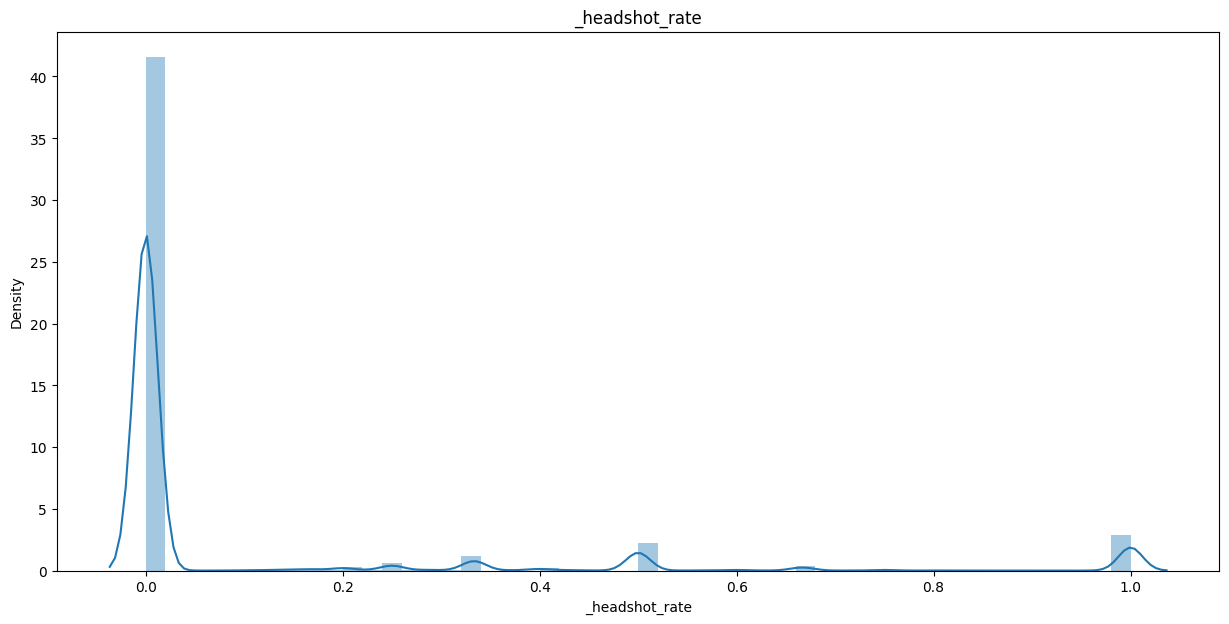

In [41]:
# Plot the distribution of headshot_rate

show_distplot('_headshot_rate')

In [42]:
# List of Hitman who made more than 10 kills and all the kills were done by headshot(perfect kill)

display(df_copy[(df_copy['_headshot_rate'] == 1) & (df_copy['kills'] >= 10)].shape)

df_copy[(df_copy['_headshot_rate'] == 1) & (df_copy['kills'] >= 10)].head(10)

(24, 31)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0,0.0,0,0,2939.0,5,0,0.8462,2939.0,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,0,0.0,0,0,3422.0,8,1560,1.0000,8142.0,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0,0.0,0,0,2105.0,5,1587,1.0000,2105.0,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0,0.0,2,0,2761.0,7,1519,0.9630,7948.0,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,0,0.0,0,0,2458.0,4,1562,1.0000,3476.0,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,0,0.0,0,0,2932.0,4,0,1.0000,8178.0,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,0,0.0,0,0,2450.0,7,1468,1.0000,2858.9,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,0,0.0,0,0,3915.0,5,0,1.0000,5963.0,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,0,0.0,0,0,3108.0,7,1500,1.0000,3108.0,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,0,140.8,0,0,2339.0,4,0,1.0000,2479.8,1.0


It is unclear if these players are cheating or they are legends. So, for now we are not removing these players from the dataset

**Killing without moving**

In [43]:
# Create a new feature _kill_without_moving
df_copy['_kill_without_moving'] = ((df_copy['kills'] > 0) & (df_copy['_total_distance'] == 0))

# Check players who kills without moving

display(df_copy[df_copy['_kill_without_moving'] == True].shape)
df_copy[df_copy['_kill_without_moving'] == True].head(10)

(1535, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.000000,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,0.0,0.000000,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,0.0,0.200000,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,0.0,0.000000,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,0.0,1.000000,True
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0.0,0,0,0.0,8,0,0.8000,0.0,0.166667,True
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0.0,0,0,0.0,8,0,0.6000,0.0,0.333333,True
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.285714,True
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,0.0,0,0,0.0,12,1500,0.2857,0.0,0.500000,True
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0.0,0,0,0.0,4,0,0.8571,0.0,0.000000,True


In [44]:
# Drop kill without moving fraudsters

df_copy.drop(df_copy[df_copy['_kill_without_moving'] == True].index, inplace = True)

**Longest Kills**

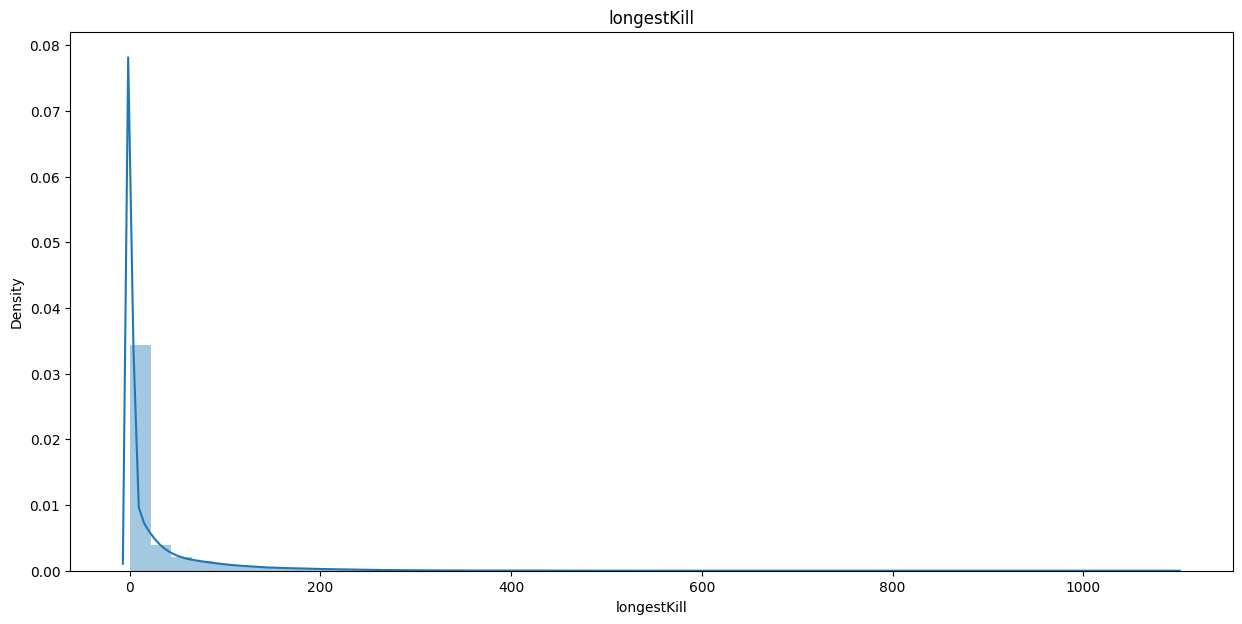

In [45]:
show_distplot('longestKill')

In [46]:
# Is it possible to snipe (kill) someone from a distance > 1 km in this game?
df_copy[df_copy['longestKill'] >= 100].head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.3,1,2,3,15,...,0.0,0,0,1264.0,4,1494,0.7500,3596.0,1.000000,False
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.0,6,2,2,2,...,0.0,0,0,2727.0,7,1603,0.9592,7587.0,0.222222,False
24,736eda9b9c20b3,d35e80e4e64dd4,62fbe726028662,0,3,327.6,4,1,1,3,...,0.0,0,0,3503.0,4,1496,0.9231,3503.0,0.250000,False
25,4c45dc732689ec,8e0a0ea95d3596,37f43ba55ec0a4,1,4,558.6,3,0,4,11,...,0.0,0,0,2711.0,7,1494,0.8696,3894.0,0.000000,False
28,f9473c4f1cfdc4,8483976f3ba230,6057f846f3ed12,0,6,345.6,2,1,1,6,...,0.0,0,0,3855.0,4,0,0.9630,3855.0,0.250000,False


In [47]:
# Dropping the longest kill fraudster
df_copy.drop(df_copy[df_copy['longestKill'] >= 100].index, inplace = True)

**Road Kills**

In [48]:
# Players who got more than 10 roadkills.

df_copy[df_copy['roadKills'] > 10].head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,5.297,0,0,1277.0,0,1371,0.4286,1282.302,0.00,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,0.000,0,0,816.6,5,1533,0.4713,4934.600,0.00,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,0.000,0,0,3150.0,4,1568,1.0000,5876.000,0.05,False


In [49]:
# Dropping the roadkill fraudster
df_copy.drop(df_copy[df_copy['roadKills'] > 10].index, inplace = True)

###### Finding anamoly in travelling

PUBG map is 8*8 km and each yellow square represents 1 km.

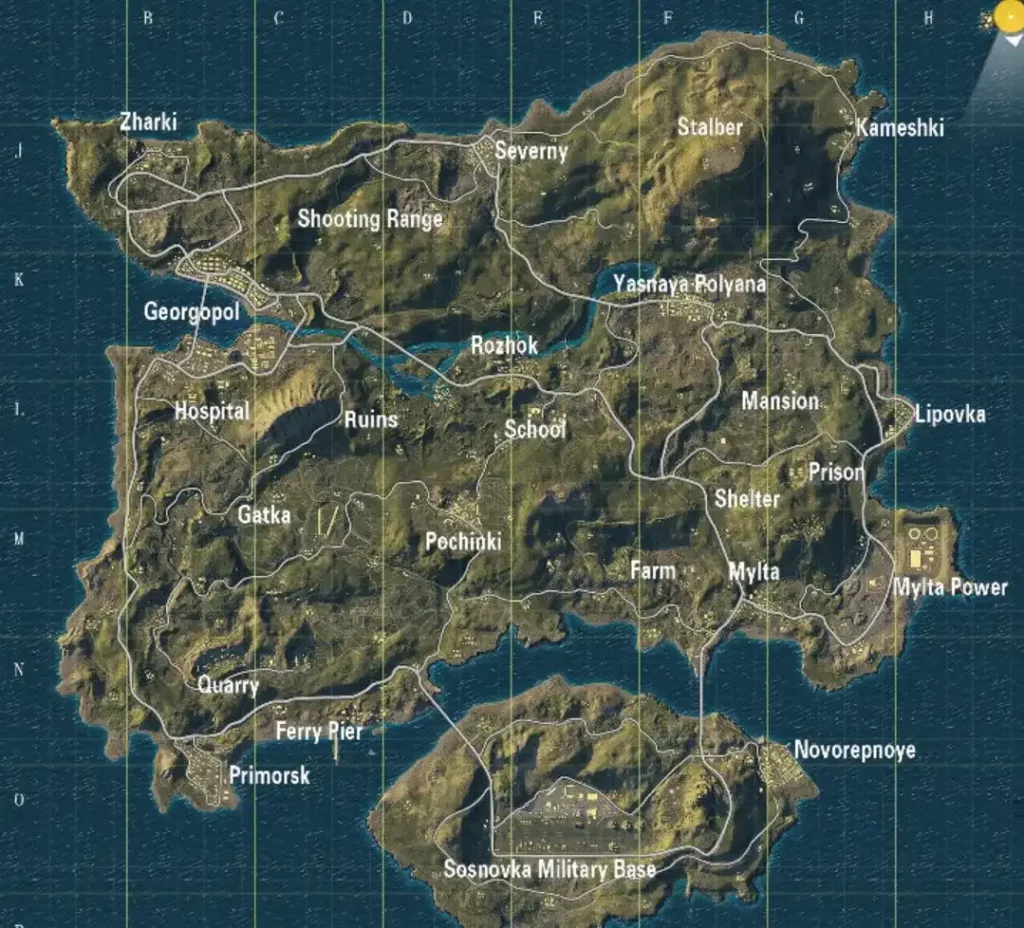

In [50]:
df_copy[['walkDistance', 'rideDistance', 'swimDistance']].describe()

,walkDistance,rideDistance,swimDistance
count,4.130394e+06,4.130394e+06,4.130394e+06
mean,1.046154e+03,5.377958e+02,4.126676e+00
std,1.121425e+03,1.414724e+03,2.931287e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.385000e+02,0.000000e+00,0.000000e+00
50%,5.611000e+02,0.000000e+00,0.000000e+00
75%,1.764000e+03,0.000000e+00,0.000000e+00
max,2.578000e+04,4.071000e+04,3.823000e+03


**Detecting Anomalies in Walking**

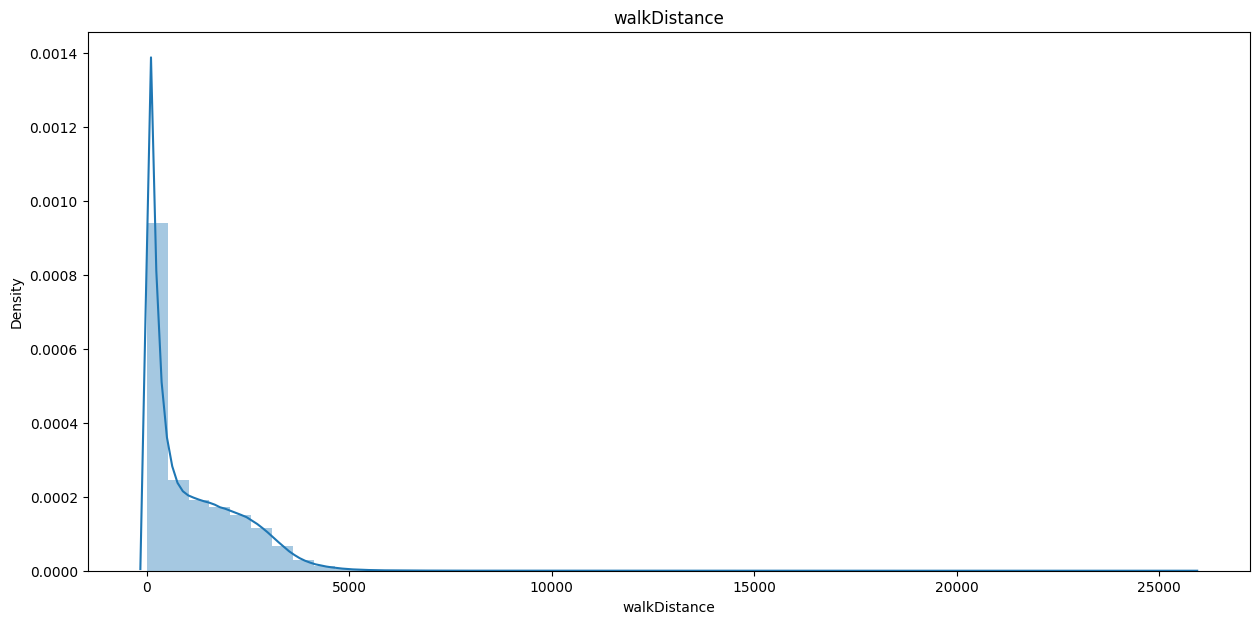

In [51]:
show_distplot('walkDistance')

In [52]:
# Travel Lust and wandrer ---> They just play to roam around and explore places without killing anyone and how they travel 13 kms in the game?

df_copy[(df_copy['walkDistance'] >= 13000) & (df_copy['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,9.882,0,0,13530.0,7,0,0.8163,13540.3032,0.0,False
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.00,0,0,0,46,...,381.900,0,0,25780.0,0,0,0.9894,26161.9078,0.0,False
1072113,692e7657b6e340,10baa5ce3cdffe,ad7403ad4d20a9,0,1,0.00,0,0,5,50,...,15.270,1,0,13040.0,4,0,0.6786,13055.2898,0.0,False
1137979,3c23cf6c61171f,90b6aaaa2a16b7,a52c5ac7c18311,0,2,0.00,0,0,27,41,...,80.340,0,0,13160.0,3,0,0.9643,13240.3948,0.0,False
1188935,2dd8f83eb3bd7f,d1e7809ff69bb4,c8585bc8a88aa6,0,0,0.00,0,0,0,44,...,180.700,0,0,13360.0,4,0,0.9643,14798.7000,0.0,False
1797162,7b9a750b17e9c6,2d00192e4029c5,6fe77402ddb0e1,0,0,0.00,0,0,0,55,...,129.400,0,0,16250.0,3,0,0.6000,16379.4401,0.0,False
2078996,1284474083cc33,fa7e10443cc7df,c62835e88e61a6,0,2,0.00,0,0,3,48,...,256.900,0,0,14250.0,8,0,0.8000,15354.6000,0.0,False
2238900,861d1e5a63f3e6,1da6a90addf96d,16f2c51578f323,0,1,0.00,0,0,5,46,...,389.500,0,0,15370.0,7,0,0.8125,15759.5111,0.0,False
2990339,fc3fdd39dcd266,f901321bc27871,c0ebfb404aaa47,0,4,75.35,0,0,0,40,...,42.190,0,0,13070.0,4,0,0.9286,14902.1900,0.0,False
3318429,25a548c95fa48f,978df298b094ba,99407bcde7569c,0,0,0.00,0,0,2,39,...,38.440,0,0,13660.0,1,0,0.8913,13698.4539,0.0,False


In [53]:
# Drop walking anomalies

df_copy.drop(df_copy[(df_copy['walkDistance'] >= 13000) & (df_copy['kills'] == 0)].index, inplace = True)

**Detecting Anomalies in Riding**

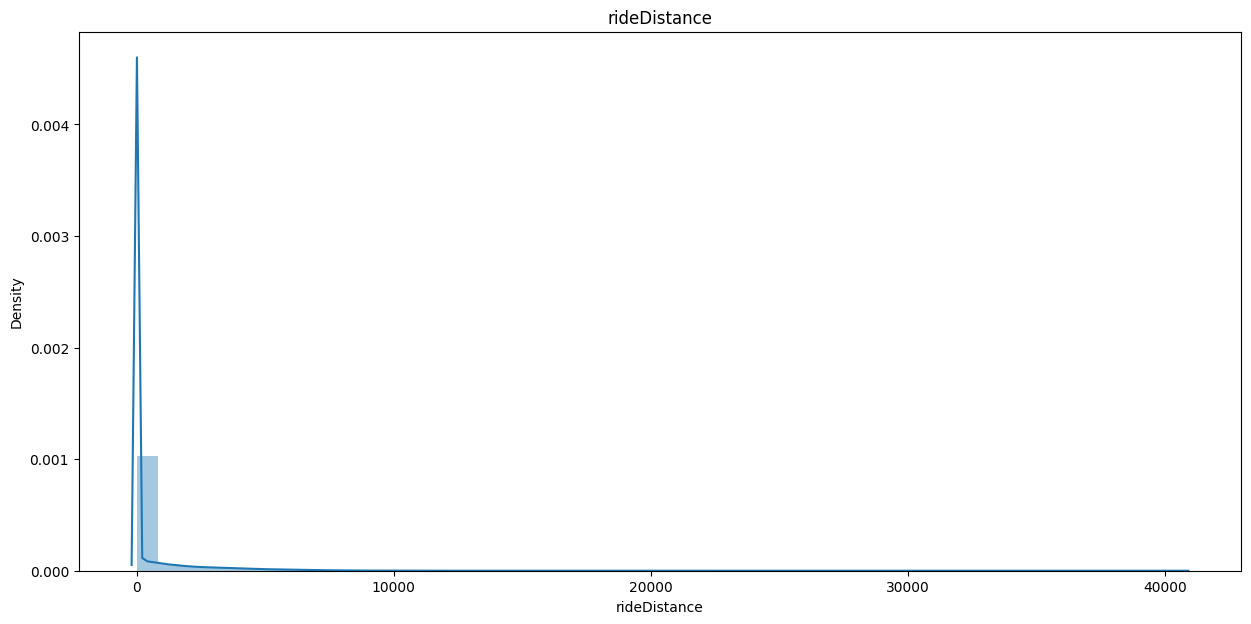

In [54]:
show_distplot('rideDistance')

In [55]:
# Travel Lust and wandrer ---> They just play to roam around and explore places without killing anyone and how they - How can you ride 30 km?

df_copy[(df_copy['rideDistance'] >= 13000) & (df_copy['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
4906,8f05e600c7c8b8,560528edc46d1f,48167b9435e7c1,0,2,16.22,0,0,2,48,...,0.00,0,0,624.10,3,1520,0.7500,17834.10,0.0,False
16895,6da7b6c5cda276,d2982ffa6a2a3c,f5ec4d90b83c91,0,0,7.53,0,0,0,40,...,0.00,0,0,635.40,3,1500,0.9419,16175.40,0.0,False
25437,7390e4fc2da7e5,e97c10b405d4b8,bae6e161c230e1,0,2,0.00,1,0,1,60,...,11.08,0,0,954.90,3,0,0.5769,14145.98,0.0,False
38059,21a42fa4d7e58e,10c5197b53ac30,43be135286512b,0,0,0.00,0,0,0,52,...,0.00,0,0,1508.00,4,0,0.6869,15018.00,0.0,False
48084,30abe4cbc9344d,4684bc6d097ae2,3646053157cc0b,0,0,0.00,0,0,2,57,...,0.00,0,0,237.80,2,0,0.5185,17807.80,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404738,810bcb9e6ff249,605266536c0f45,7f817462a20c19,0,1,84.40,0,0,0,38,...,0.00,1,0,114.70,0,1523,0.6438,24344.70,0.0,False
4405648,3e9df446d67e4e,e06bb4e3de4dc6,7c5563ca1565c3,0,0,0.00,0,0,0,50,...,0.00,0,0,979.70,7,1530,0.6111,14029.70,0.0,False
4414679,8f07a57215c4af,3eed0af867742b,59de966d91cc85,0,0,46.71,0,0,0,55,...,0.00,0,0,343.60,1,0,0.5319,18353.60,0.0,False
4415970,bc080f4ffa17cf,750f374e4f3eac,121f65b7368831,0,5,56.13,0,0,1,41,...,0.00,0,0,1349.00,3,1500,0.8696,17909.00,0.0,False


In [56]:
# How is it even possible that a player is able to ride and kill without walking even a single meter?

df_copy[(df_copy['rideDistance'] >= 13000) & (df_copy['kills'] > 0) & (df_copy['walkDistance'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving


In [57]:
df_copy[df_copy['_total_distance'] == 0]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,0.0,0,0,0.0,0,847,0.0000,0.0,0.0,False
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,0.0,0,0,0.0,0,765,0.0000,0.0,0.0,False
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,0.0,0,0,0.0,0,1510,0.0000,0.0,0.0,False
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0.0,0,0,0.0,0,0,0.1277,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446843,56f1ff8594a328,63008ee9676bc3,b3f07953e112dc,0,0,0.0,0,0,0,99,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
4446849,19d2b52c9e17a3,f8a952ce9ab7aa,2afb2889026133,0,0,0.0,0,0,0,90,...,0.0,0,0,0.0,0,1363,0.0412,0.0,0.0,False
4446905,f93dfebceecc59,c54ca5bb9df107,e1da3a1ee799ef,0,0,0.0,0,0,0,89,...,0.0,0,0,0.0,1,0,0.0417,0.0,0.0,False
4446926,e0c791ea3c4644,e18240dcce54f9,827639896a20cb,0,0,0.0,0,0,0,87,...,0.0,0,0,0.0,0,916,0.0000,0.0,0.0,False


In [58]:
# Drop walking anomalies

df_copy.drop(df_copy[(df_copy['walkDistance'] >= 13000) & (df_copy['kills'] == 0)].index, inplace = True)
df_copy.drop(df_copy[(df_copy['rideDistance'] >= 13000) & (df_copy['kills'] > 0) & (df_copy['walkDistance'] == 0)].index, inplace = True)
df_copy.drop(df_copy[df_copy['_total_distance'] == 0].index, inplace= True)

**Detecting Anomalies in Swimming**

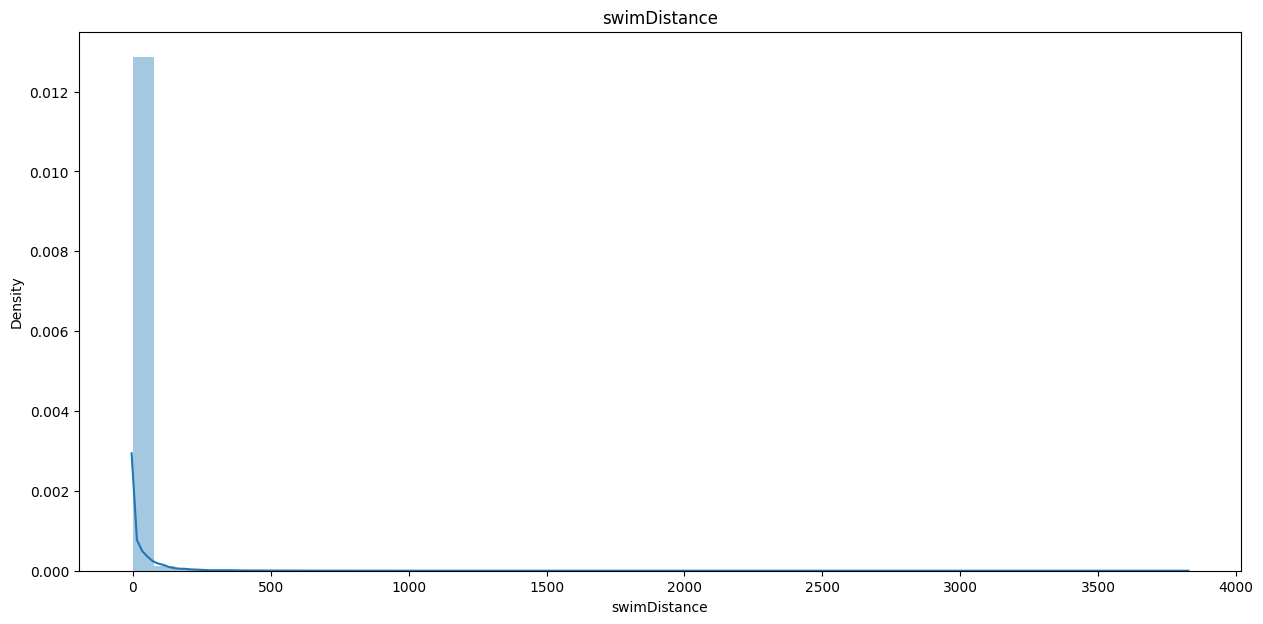

In [59]:
show_distplot('swimDistance')

In [60]:
# How can you swim more than 2 km without breathing?

df_copy[df_copy['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,2295.0,0,0,1002.000,4,1466,0.9592,3297.000,0.0,False
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,2148.0,0,0,2276.000,5,0,0.9600,10113.000,0.0,False
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,2668.0,0,0,415.100,10,1499,1.0000,3083.100,0.2,False
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,3823.0,0,0,995.300,9,0,1.0000,4818.300,0.5,False
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.00,0,0,0,47,...,2484.0,0,0,1966.000,3,0,0.5833,5314.000,0.0,False
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,3514.0,0,0,4296.000,8,1492,0.8511,9899.000,0.0,False
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.40,2,0,0,7,...,2387.0,0,0,7.546,6,0,1.0000,2394.546,0.0,False
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.00,0,0,0,77,...,2338.0,0,0,1750.000,0,1518,0.2143,4088.000,0.0,False
3513522,aff482b8c08486,383db055216ec2,d6e13468e28ab4,0,4,109.80,0,0,18,40,...,2124.0,0,0,3973.000,5,0,0.9600,9809.000,0.0,False
4132225,2496e3223a8b5d,78980ab36f7642,23ec7dd5546022,0,0,0.00,0,0,0,83,...,2382.0,0,0,1534.000,0,0,0.0851,3916.000,0.0,False


In [61]:
# Drop swimming anomalies

df_copy.drop(df_copy[df_copy['swimDistance'] >= 2000].index, inplace = True)

**Anamolies detection in Supplies (Weapons Acquired)**

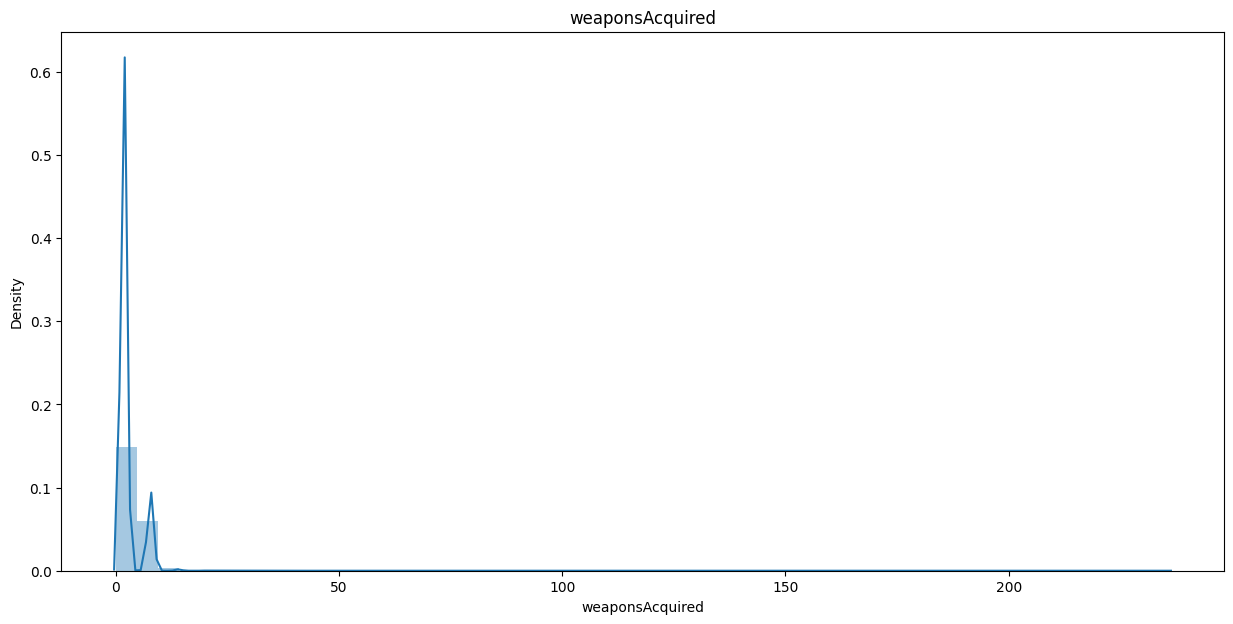

In [62]:
show_distplot('weaponsAcquired')

In [63]:
display(df_copy[df_copy['weaponsAcquired'] >= 80].shape)

df_copy[df_copy['weaponsAcquired'] >= 80].head()

(19, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0.0,0,0,1307.0,128,1577,0.7111,3187.0,0.000000,False
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0.0,0,0,1687.0,80,0,0.7500,1687.0,0.000000,False
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0.0,0,0,653.1,95,0,0.5600,653.1,0.000000,False
1462706,be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0,5377.00,0,8,4,3,...,0.0,0,0,1128.0,83,0,0.8000,2082.4,0.150943,False
1592744,634a224c53444e,75fa7591d1538c,f900de1ec39fa5,9,0,1726.00,0,3,0,9,...,0.0,0,0,980.8,94,0,0.2000,2888.8,0.130435,False


Player '7c8c83f5f97d0f' acquired 178 weapons in one game

In [64]:
# Removing outliers

df_copy.drop(df_copy[df_copy['weaponsAcquired'] >= 80].index, inplace = True)

**Anamolies in Heals**

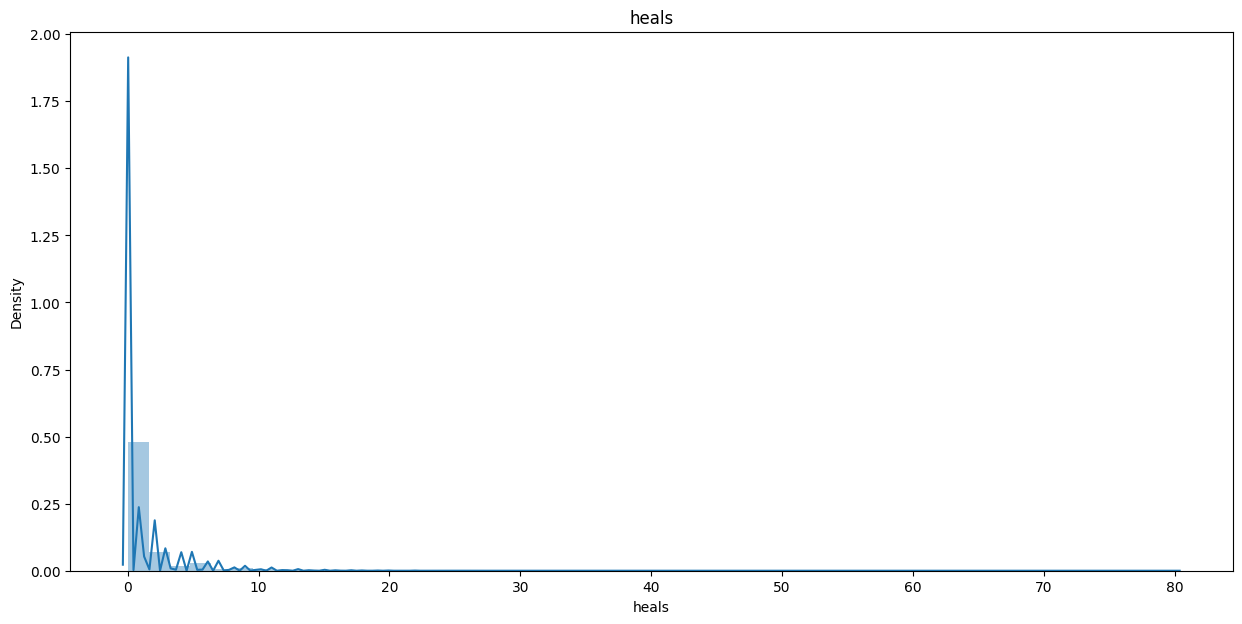

In [65]:
show_distplot('heals')

In [66]:
# 40 or moew healing items used
display(df_copy[df_copy['heals'] >= 40].shape)

df_copy[df_copy['heals'] >= 40].head()

(121, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0.000,0,0,1387.0,6,0,0.9368,6854.000,0.0,False
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,292.400,0,0,2791.0,7,0,0.9615,3083.400,1.0,False
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,3.443,0,0,1340.0,3,1543,0.8333,1343.443,0.0,False
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0.000,0,0,1510.0,6,0,0.8646,7444.000,0.0,False
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0.000,0,0,1968.0,9,0,0.8370,5816.000,0.0,False


In [67]:
# Removing outliers

df_copy.drop(df_copy[df_copy['heals'] >= 40].index, inplace = True)

In [68]:
df_copy.shape

(4034399, 32)

In [69]:
#df_copy.to_csv('S:\GitHub Projects\PUBG\Datasets\Cleaned_pubg.csv', index= False)

In [70]:
df_clean = pd.read_csv("S:\GitHub Projects\PUBG\Datasets\PUBG_Game_Prediction_data.csv")

df_clean.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_total_distance,_headshot_rate,_kill_without_moving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,244.8000,0.0,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,1445.0445,0.0,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,161.8000,0.0,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,202.7000,0.0,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,49.7500,0.0,False


##### 3. Feature Engineering

**Adding/ Removing some new Features and finding their correlation with the winPlacePer**

A game in PUBG can have up to 100 players fighting woth each other. But most of the times a game isn't "full". There is no variable that gives us the number of players joined. So lets create a one.

In [71]:
df_clean['_players_joined'] = df_clean.groupby('matchId')['matchId'].transform('count')

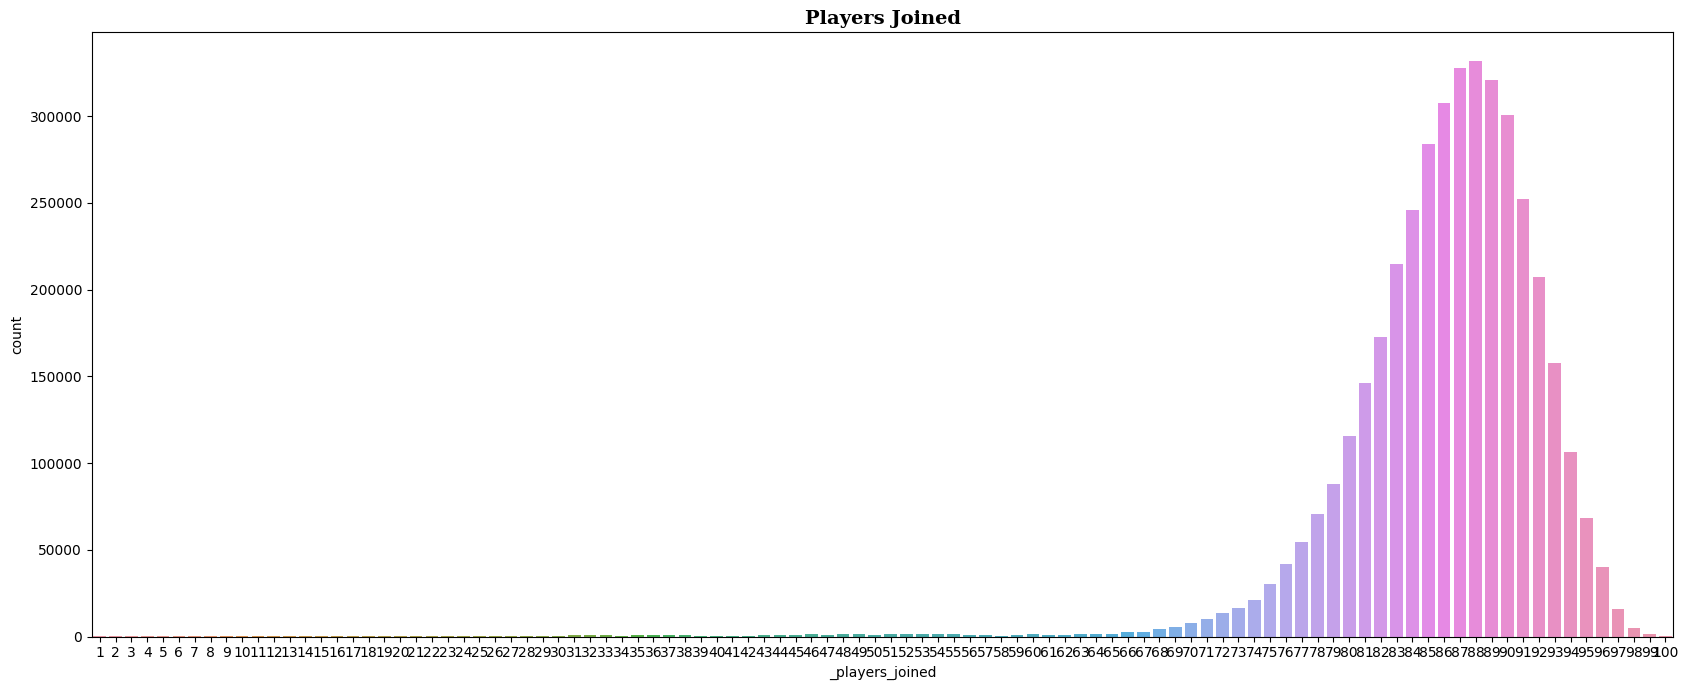

In [72]:
df_clean[df_clean['_players_joined'] > 49]
plt.figure(figsize = (17,7))
sns.countplot(data = df_clean, x = '_players_joined')
plt.title('Players Joined', fontsize = 14, fontweight = 'bold', fontfamily = 'serif')
plt.tight_layout();

**Normalizing the feature**

Now that we have a feature '_players_joined' we can normalize the features based on the amount of players. Features that can be valuable to normalize are:

* kills
* damageDealt
* maxPlace
* matchDuration

In [73]:
# Create normalized Features

df_clean['_kills_Norm'] = df_clean['kills'] * ((100 - df_clean['_players_joined'])/100 + 1)
df_clean['_damage_dealt_Norm'] = df_clean['damageDealt'] * ((100 - df_clean['_players_joined'])/100 + 1)
df_clean['_maxPlace_Norm'] = df_clean['maxPlace'] * ((100 - df_clean['_players_joined'])/100 + 1)
df_clean['_matchDuration_Norm'] = df_clean['matchDuration'] * ((100 - df_clean['_players_joined'])/100 + 1)

# Compare standard features and normalized features
to_show = ['Id', 'kills', '_kills_Norm', 'damageDealt', '_damage_dealt_Norm', 'maxPlace', '_maxPlace_Norm', 'matchDuration', '_matchDuration_Norm']
df_clean[to_show].head(11)


,Id,kills,_kills_Norm,damageDealt,_damage_dealt_Norm,maxPlace,_maxPlace_Norm,matchDuration,_matchDuration_Norm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.96,1306,1397.42
1,eef90569b9d03c,0,0.00,91.470,109.76400,26,31.20,1777,2132.40
2,1eaf90ac73de72,0,0.00,68.000,74.80000,50,55.00,1318,1449.80
3,4616d365dd2853,0,0.00,32.900,36.51900,31,34.41,1436,1593.96
4,315c96c26c9aac,1,1.11,100.000,111.00000,97,107.67,1424,1580.64
5,ff79c12f326506,1,1.14,100.000,114.00000,28,31.92,1395,1590.30
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,31.36,1316,1473.92
7,311b84c6ff4390,0,0.00,8.538,9.56256,96,107.52,1967,2203.04
8,1a68204ccf9891,0,0.00,51.600,56.76000,28,30.80,1375,1512.50
9,e5bb5a43587253,0,0.00,37.270,42.11510,29,32.77,1930,2180.90


In [74]:
match_grp = df_clean.groupby('matchId')

df_clean['_kills_Perc'] = match_grp['kills'].rank(pct=True).values
df_clean['_kills_place_Perc'] = match_grp['killPlace'].rank(pct=True).values
df_clean['_walk_distance_Perc'] = match_grp['walkDistance'].rank(pct=True).values
df_clean['_damage_dealt_Perc'] = match_grp['damageDealt'].rank(pct=True).values
df_clean['_walkPerc_killsPerc'] = df_clean['_walk_distance_Perc'] / df_clean['_kills_Perc']

df_clean.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,_players_joined,_kills_Norm,_damage_dealt_Norm,_maxPlace_Norm,_matchDuration_Norm,_kills_Perc,_kills_place_Perc,_walk_distance_Perc,_damage_dealt_Perc,_walkPerc_killsPerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,93,0.00,0.000,29.96,1397.42,0.301075,0.634409,0.473118,0.150538,1.571429
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,80,0.00,109.764,31.20,2132.40,0.281250,0.587500,0.612500,0.487500,2.177778
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,90,0.00,74.800,55.00,1449.80,0.288889,0.488889,0.355556,0.433333,1.230769
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,89,0.00,36.519,34.41,1593.96,0.280899,0.820225,0.235955,0.303371,0.840000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,89,1.11,111.000,107.67,1580.64,0.691011,0.449438,0.191011,0.589888,0.276423


In [75]:
df_corr = df_clean[['_kills_Perc', '_kills_place_Perc', '_walk_distance_Perc', '_damage_dealt_Perc', '_walkPerc_killsPerc', 'winPlacePerc']].corr()

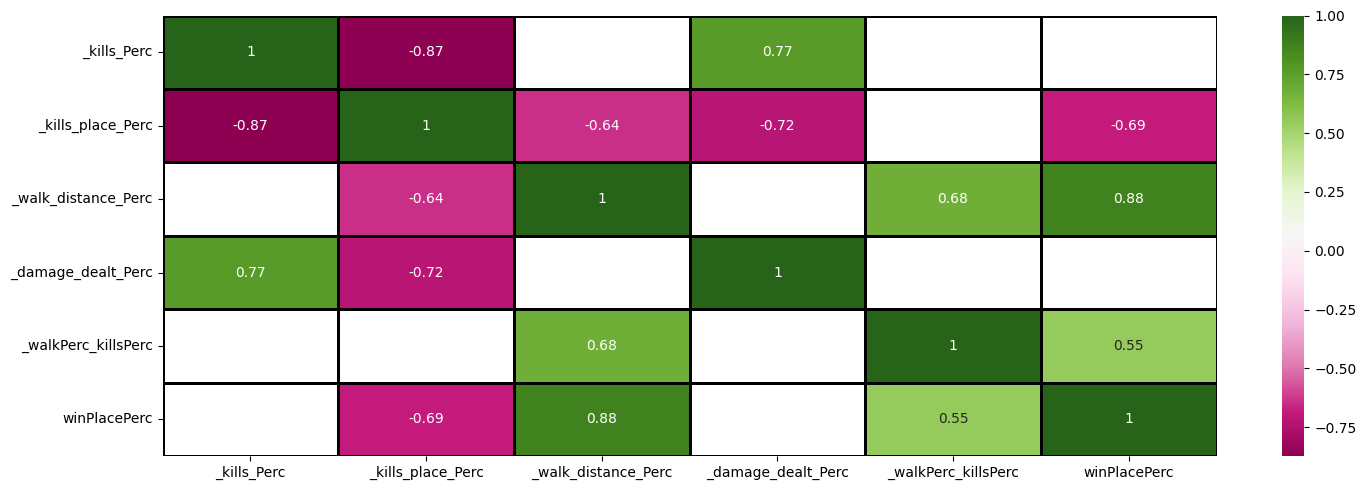

In [76]:
plt.figure(figsize = (15,5))
sns.heatmap(df_corr[(df_corr <= -0.5) | (df_corr >= 0.5)], annot= True, cmap = 'PiYG', linewidths=1, linecolor='black');

plt.tight_layout()

del df_corr

In [77]:
agg = df_clean.groupby(['groupId']).size().to_frame('players_in_team')

df_clean =  df_clean.merge(agg, how= 'left', on = ['groupId'])

df_clean['_health_items'] = df_clean['heals'] + df_clean['boosts']
df_clean['_head_shot_kill_rate'] = df_clean['headshotKills'] / df_clean['kills']
df_clean['_killPlace_over_maxPlace'] = df_clean['killPlace'] / df_clean['maxPlace']
df_clean['_kills_over_walkDistance'] = df_clean['kills'] / df_clean['walkDistance']
df_clean['_kills_over_distance'] = df_clean['kills'] / df_clean['_total_distance']
df_clean['_walkDistance_per_Sec'] = df_clean['walkDistance'] / df_clean['matchDuration']

df_clean.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,_walk_distance_Perc,_damage_dealt_Perc,_walkPerc_killsPerc,players_in_team,_health_items,_head_shot_kill_rate,_killPlace_over_maxPlace,_kills_over_walkDistance,_kills_over_distance,_walkDistance_per_Sec
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.473118,0.150538,1.571429,4,0,NaN,2.142857,0.000000,0.000000,0.187443
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.612500,0.487500,2.177778,4,0,NaN,2.192308,0.000000,0.000000,0.806978
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.355556,0.433333,1.230769,2,0,NaN,0.940000,0.000000,0.000000,0.122762
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.235955,0.303371,0.840000,1,0,NaN,2.419355,0.000000,0.000000,0.141156
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.191011,0.589888,0.276423,1,0,0.0,0.463918,0.020101,0.020101,0.034937


In [78]:
df_corr = df_clean[['killPlace', 'walkDistance', 'players_in_team', '_health_items', '_head_shot_kill_rate', '_killPlace_over_maxPlace', '_kills_over_walkDistance',
                    '_kills_over_distance', '_walkDistance_per_Sec', 'winPlacePerc']].corr()

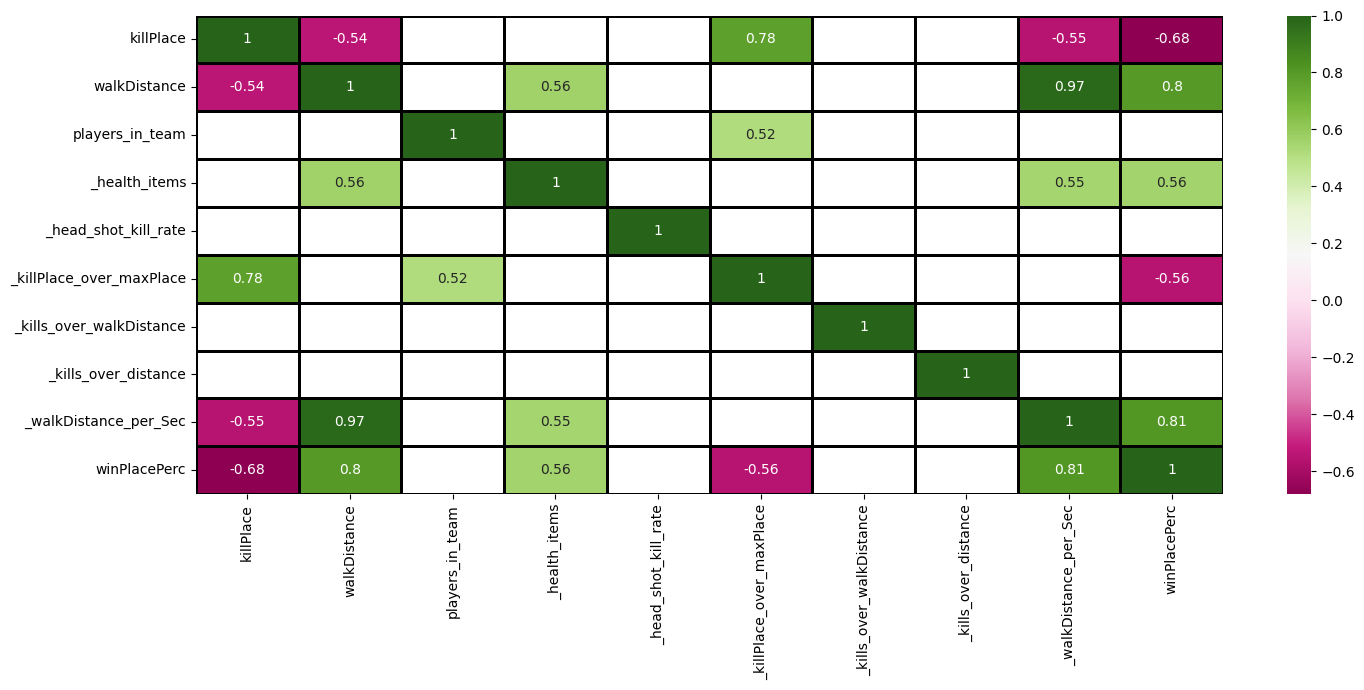

In [79]:
plt.figure(figsize = (15,7))
sns.heatmap(df_corr[(df_corr <= -0.5) | (df_corr >= 0.5)], annot= True, cmap = 'PiYG', linewidths=1, linecolor='black');

plt.tight_layout()

del df_corr

In [80]:
df_clean.shape

(4034399, 49)

In [81]:
df_clean.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', '_total_distance',
       '_headshot_rate', '_kill_without_moving', '_players_joined',
       '_kills_Norm', '_damage_dealt_Norm', '_maxPlace_Norm',
       '_matchDuration_Norm', '_kills_Perc', '_kills_place_Perc',
       '_walk_distance_Perc', '_damage_dealt_Perc', '_walkPerc_killsPerc',
       'players_in_team', '_health_items', '_head_shot_kill_rate',
       '_killPlace_over_maxPlace', '_kills_over_walkDistance',
       '_kills_over_distance', '_walkDistance_per_Sec'],
      dtype='object')

In [82]:
df_clean.drop(['_head_shot_kill_rate', '_kills_over_distance', '_kills_over_walkDistance'], axis =1 , inplace = True)

In [83]:
df_clean.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,_matchDuration_Norm,_kills_Perc,_kills_place_Perc,_walk_distance_Perc,_damage_dealt_Perc,_walkPerc_killsPerc,players_in_team,_health_items,_killPlace_over_maxPlace,_walkDistance_per_Sec
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,1397.42,0.301075,0.634409,0.473118,0.150538,1.571429,4,0,2.142857,0.187443
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,2132.40,0.281250,0.587500,0.612500,0.487500,2.177778,4,0,2.192308,0.806978
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,1449.80,0.288889,0.488889,0.355556,0.433333,1.230769,2,0,0.940000,0.122762
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,1593.96,0.280899,0.820225,0.235955,0.303371,0.840000,1,0,2.419355,0.141156
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,1580.64,0.691011,0.449438,0.191011,0.589888,0.276423,1,0,0.463918,0.034937


In [85]:
cols_to_fit = [col for col in df_clean.columns]

df_corr =  df_clean[cols_to_fit].select_dtypes('number').corr()

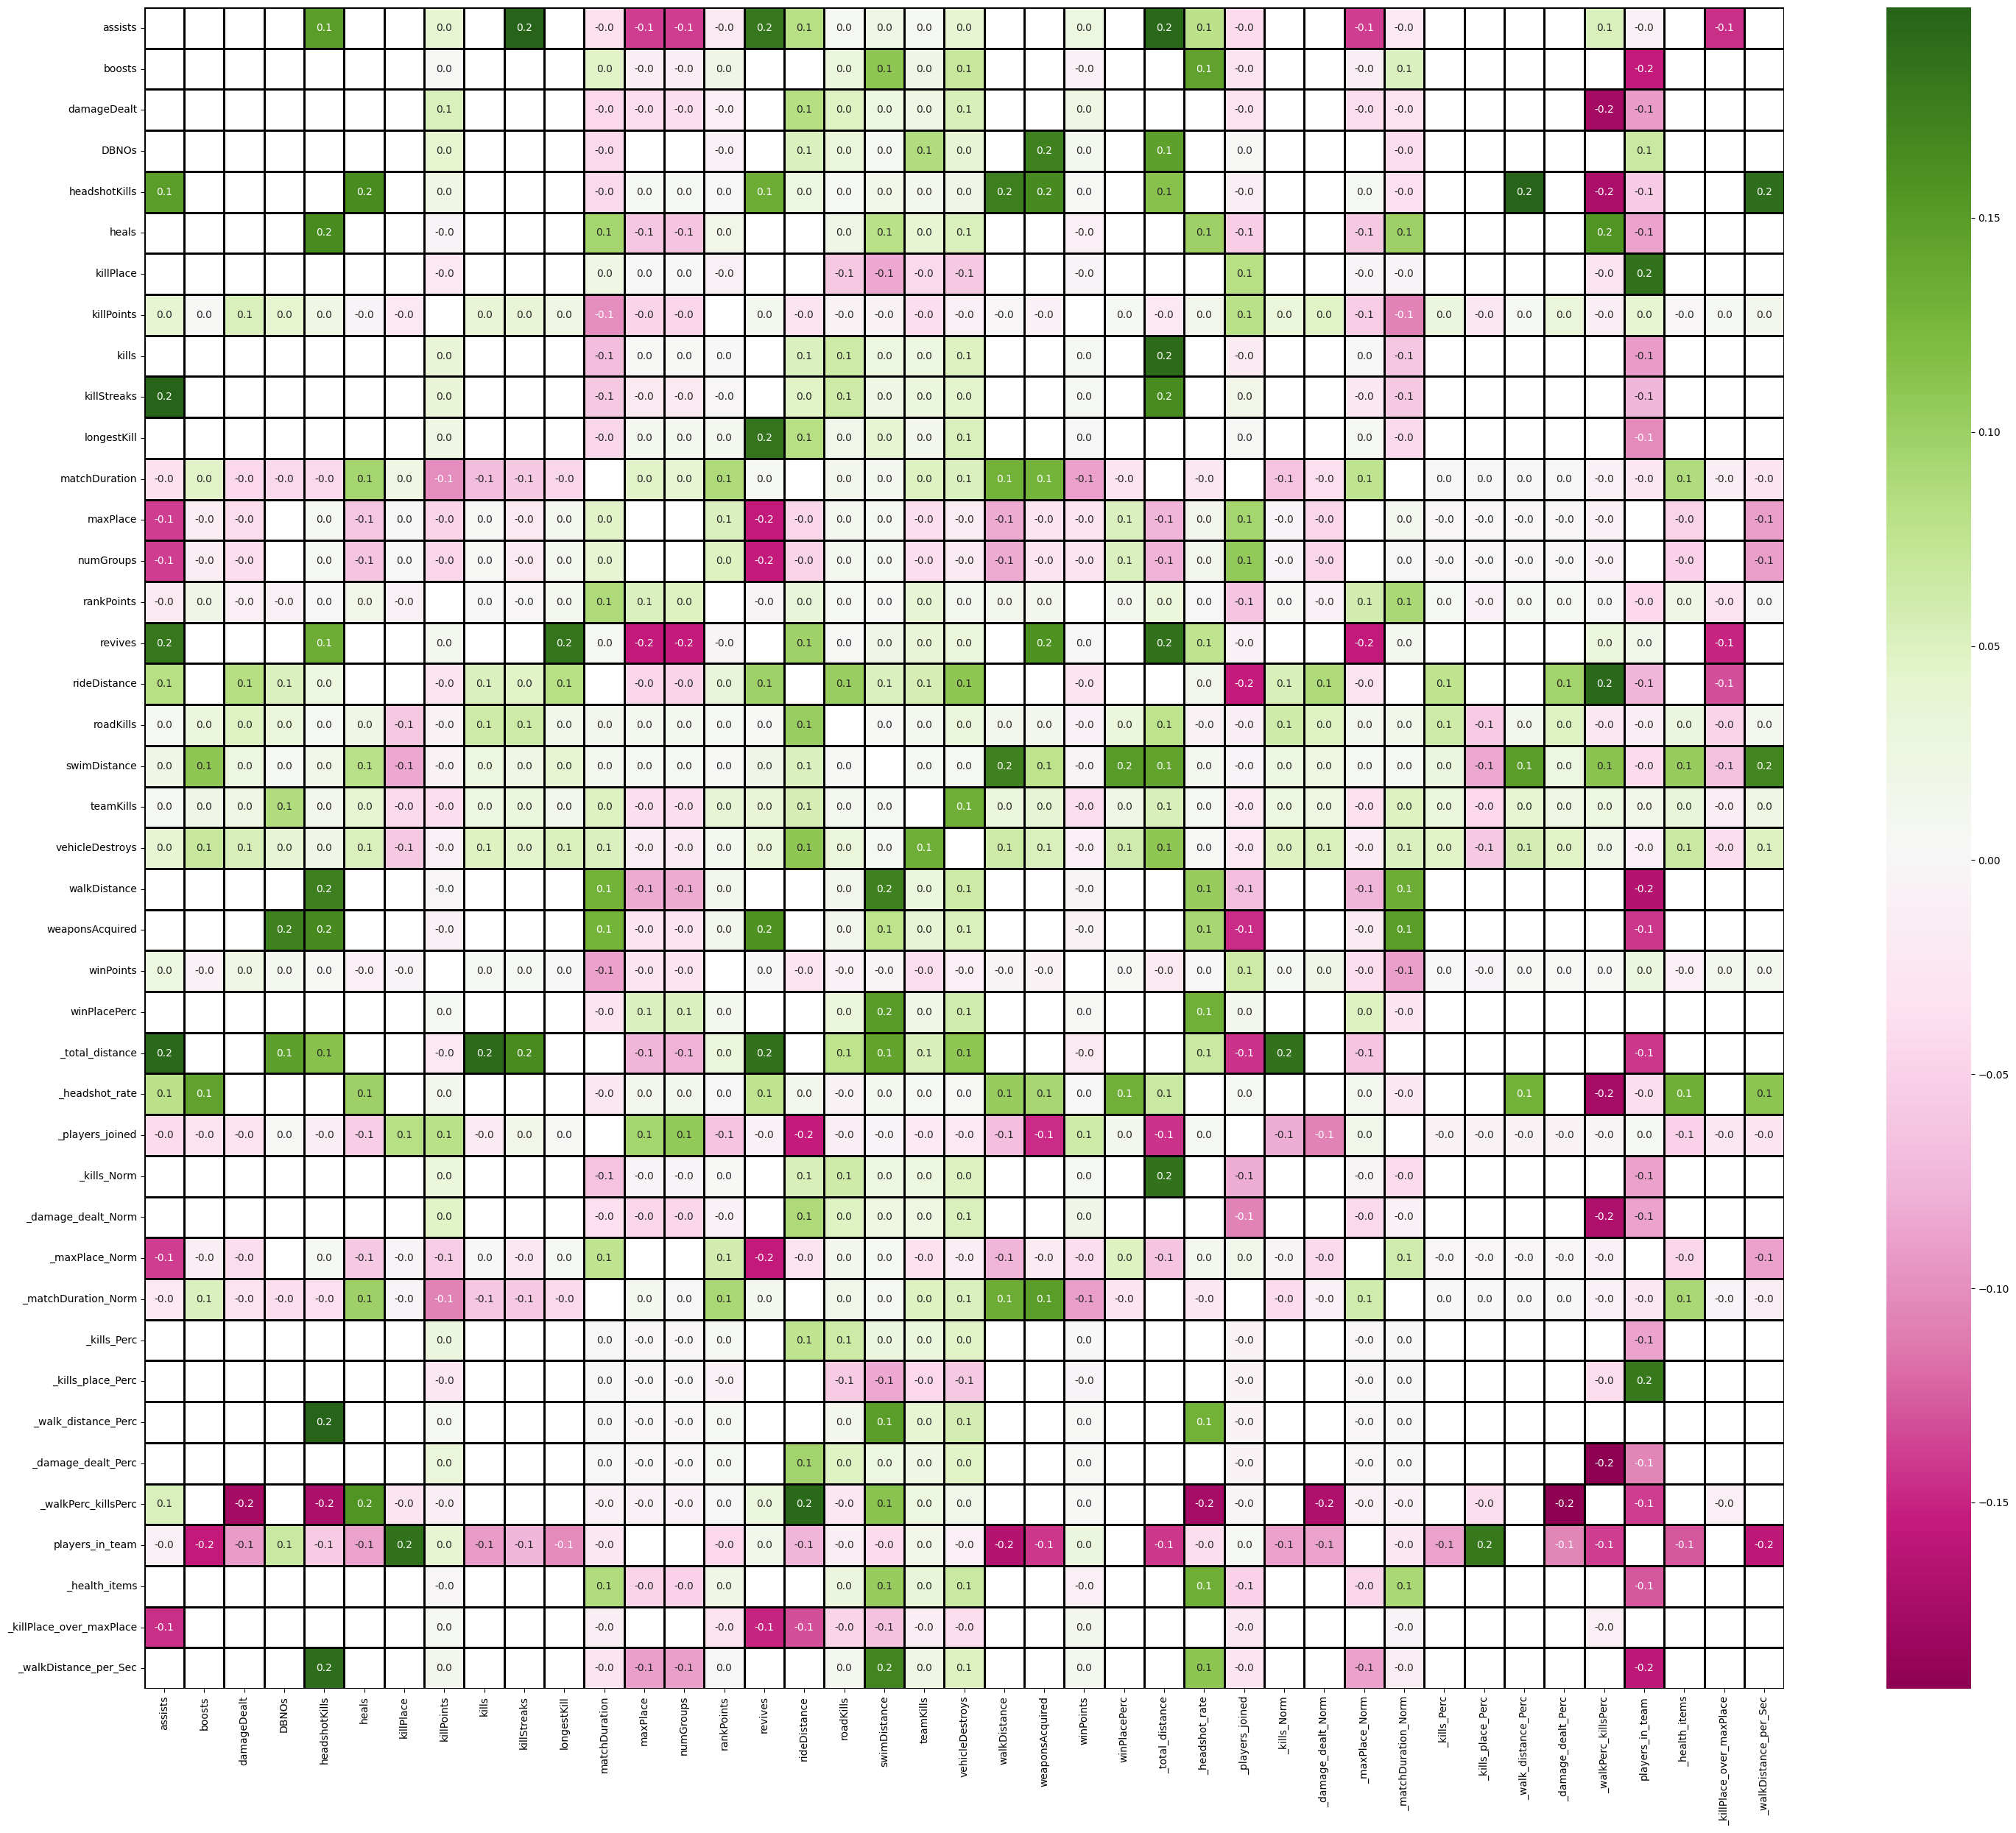

In [86]:
# Finding the attributes who has weak correlation with the Target Variable

plt.figure(figsize = (30,25))
sns.heatmap(df_corr[(df_corr <= 0.2) & (df_corr >= -0.2)], annot= True, cmap = 'PiYG', linewidths=1, linecolor='black', fmt = '.1f');

plt.tight_layout();

In [87]:
# Removing the attributes who has neutral correlations

ctr = 0

cols_to_drop = []

for i,j in zip(df_corr['winPlacePerc'].index, df_corr['winPlacePerc'].values):
  if j <= 0.2 and j>= -0.2:
    ctr += 1
    print(i,j.round(2))

    cols_to_drop.append(i)

del df_corr

killPoints 0.01
matchDuration -0.03
maxPlace 0.05
numGroups 0.05
rankPoints 0.01
roadKills 0.03
swimDistance 0.15
teamKills 0.02
vehicleDestroys 0.06
winPoints 0.01
_headshot_rate 0.13
_players_joined 0.01
_maxPlace_Norm 0.05
_matchDuration_Norm -0.03


In [88]:
# Not removing the following attributes

[cols_to_drop.remove(i) for i in ['swimDistance', 'vehicleDestroys', '_headshot_rate']]

[None, None, None]

In [89]:
df_clean.drop(cols_to_drop, axis = 1, inplace = True)

In [90]:
df_clean.shape

(4034399, 35)

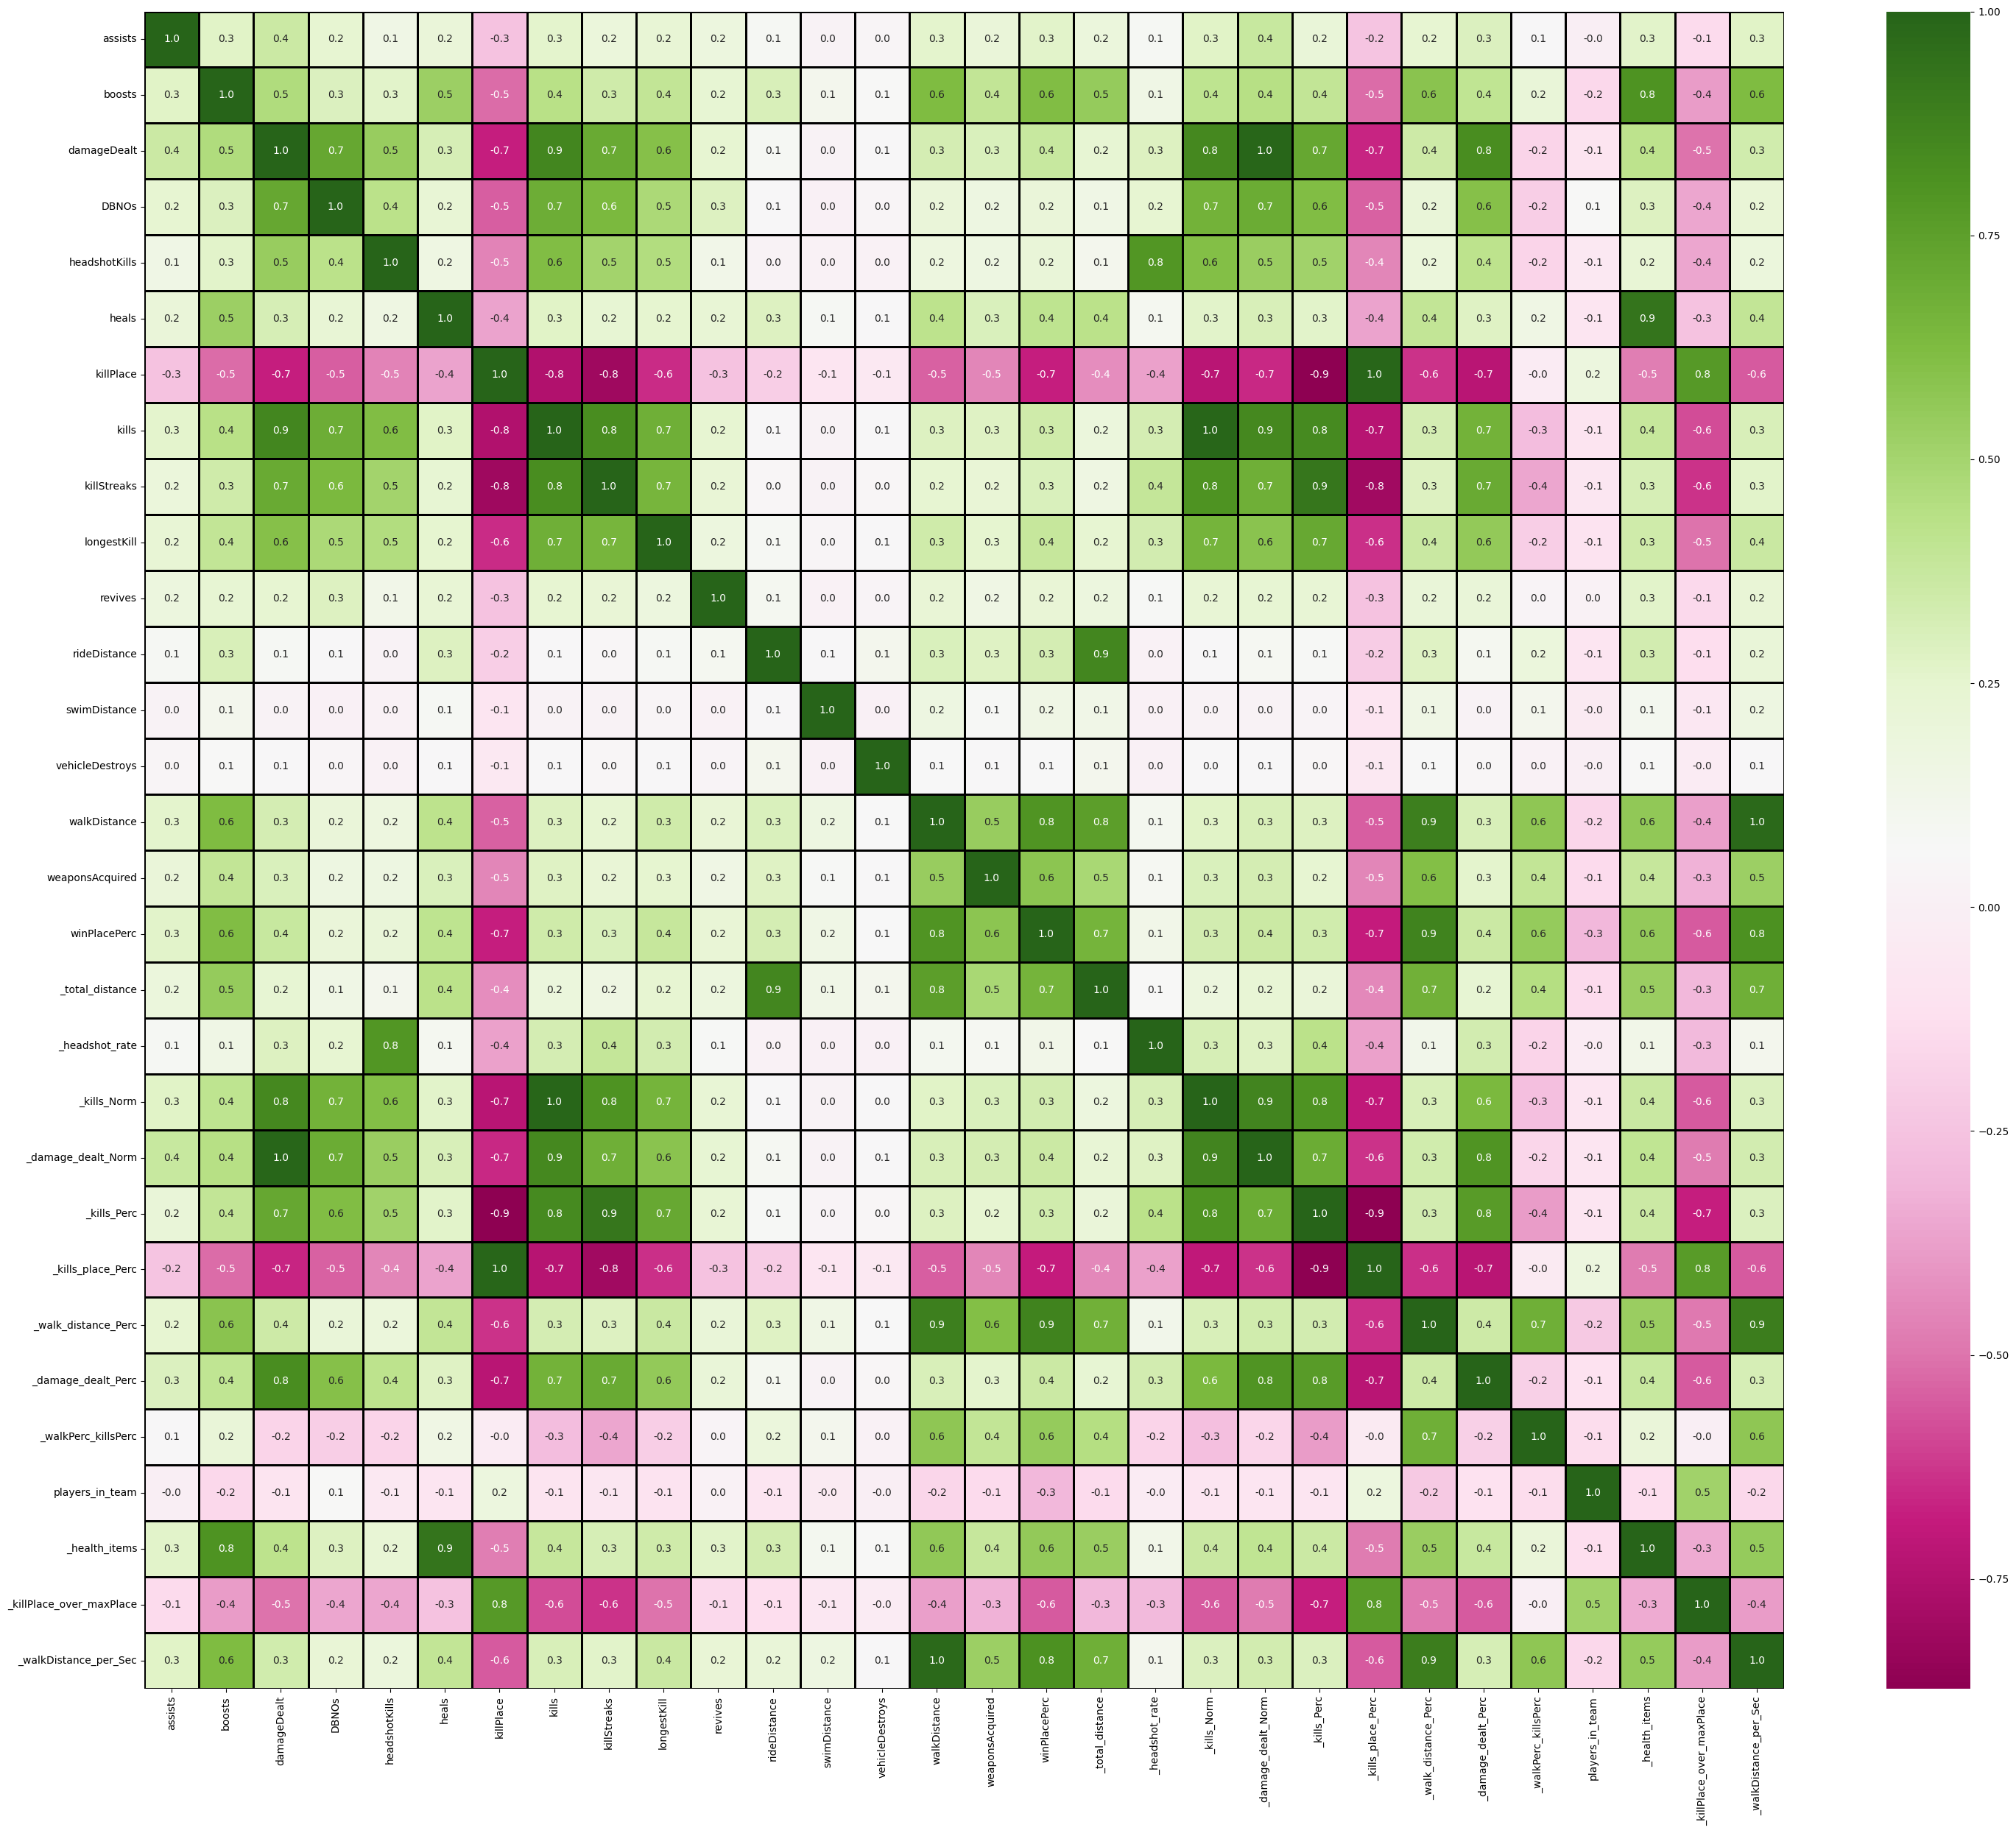

In [93]:
cols_to_fit = [col for col in df_clean.columns]
df_corr = df_clean[cols_to_fit].select_dtypes('number').corr()

plt.figure(figsize = (30,25))
sns.heatmap(df_corr, annot= True, cmap = 'PiYG', linewidths=1, linecolor='black', fmt = '.1f');

plt.tight_layout();

In [94]:
#df_clean.to_csv('S:\GitHub Projects\PUBG\Datasets\Highly_correlated.csv', index= False)

##### Machine Learning models building

In [95]:
df_hc =  pd.read_csv("S:\GitHub Projects\PUBG\Datasets\Highly_correlated.csv")

df_hc = reduce_mem_usage(df_hc)

In [96]:
df_hc.shape

(4034399, 35)

In [97]:
x = df_hc.drop('winPlacePerc', axis = 1)
y = df_hc[['winPlacePerc']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=11)

In [98]:
# Dropping ID columns

x_train.drop(['matchId', 'groupId', 'Id'], axis = 1, inplace = True)
x_test.drop(['matchId', 'groupId', 'Id'], axis = 1, inplace = True)

print(x_train.shape, x_test.shape)

(2824079, 31) (1210320, 31)


**Dealing with Categorical Variables**

In [99]:
# We will use OneHotEncoding for the 'matchType' feature

print('There are {} different Match Types in the dataset.'.format(df_hc['matchType'].nunique()))

There are 3 different Match Types in the dataset.


In [100]:
# Encoding matchType using pd.get_dummies
df_hc = pd.get_dummies(df_hc, columns = ['matchType'])

matchType_encoding = df_hc.filter(regex = 'matchType')
matchType_encoding.head()

,matchType_Duo,matchType_Solo,matchType_Squad
0,False,False,True
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False


In [101]:
# Turn groupId & matchId into categorical types
df_hc['groupId'] = df_hc['groupId'].astype('category')
df_hc['matchId'] = df_hc['matchId'].astype('category')

# Get category coding for groupId & matchId
df_hc['groupId_cat'] = df_hc['groupId'].cat.codes
df_hc['matchId_cat'] = df_hc['matchId'].cat.codes

# Get rid of old columns
df_hc.drop(columns = ['groupId', 'matchId'], inplace= True)

# Lets take a look at our newly created features
df_hc[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,587479,29996
1,792470,32654
2,807455,3131
3,1283432,45133
4,1683014,20468


In [102]:
# Drop Id column, because it probably won't be useful for the Machine learning algorithm because the test data contains different id's

df_hc.drop(columns = ['Id'], inplace = True)

**Sampling**

We will take a sample of 50000 rows from our training set for easy debugging and exploration.

In [103]:
sample_1 = 50000
df_sample = df_hc.sample(sample_1)

In [104]:
# Split the target variable, validation data, etc.

x = df_sample.drop('winPlacePerc', axis = 1)
y = df_sample['winPlacePerc']

In [105]:
# Function for splitting the training & Validation data

def split_vals(a, n:int):
  return a[:n].copy(), a[n:].copy()

val_perc = 0.12     # % to be used for validation set
n_valid = int(val_perc * sample_1)
n_trn = len(x) - n_valid

# Split data
raw_train, raw_valid = split_vals(df_sample, n_trn)
x_train, x_valid = split_vals(x, n_trn)
y_train, y_valid = split_vals(y, n_trn)

# Check dimensions of samples
print("Sample Train shape: ", x_train.shape,
      "Sample Target shape: ", y_train.shape,
      "Sample Validation shape: ", x_valid.shape)

Sample Train shape:  (44000, 35) Sample Target shape:  (44000,) Sample Validation shape:  (6000, 35)


In [106]:
# Defining function for calculating the Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


def print_score(m: RandomForestRegressor):
  res = ['mae train: ', mean_absolute_error(m.predict(x_train), y_train),
         'mae val: ', mean_absolute_error(m.predict(x_valid), y_valid)]
  # Score of the traing dataset obtained using out of bag estimate.
  if hasattr(m, 'oob_score_'): res.append(m.oob_score)
  print(res)

Creating a basic random forest model

In [107]:
rf = RandomForestRegressor(n_estimators= 40, min_samples_leaf= 3, max_features= 'sqrt', n_jobs = -1)
rf.fit(x_train, y_train)

print_score(rf)

['mae train: ', 0.034224559439014084, 'mae val: ', 0.05755497153484691]


In [108]:
# Finding Feature Importance using Random Forest

def rf_feat_imp(rf, df):
    return DataFrame({'cols': df.columns, 'imp': rf.feature_importances_}).sort_values(by='imp', ascending= False)

# What are the most predictive features according to our basic Random Forest Model
feat_imp = rf_feat_imp(rf, x); feat_imp[:15]

,cols,imp
14,walkDistance,0.157864
29,_walkDistance_per_Sec,0.138325
23,_walk_distance_Perc,0.137240
16,_total_distance,0.128519
22,_kills_place_Perc,0.092223
6,killPlace,0.081694
1,boosts,0.042223
25,_walkPerc_killsPerc,0.041215
15,weaponsAcquired,0.036807
28,_killPlace_over_maxPlace,0.036509


<Axes: ylabel='cols'>

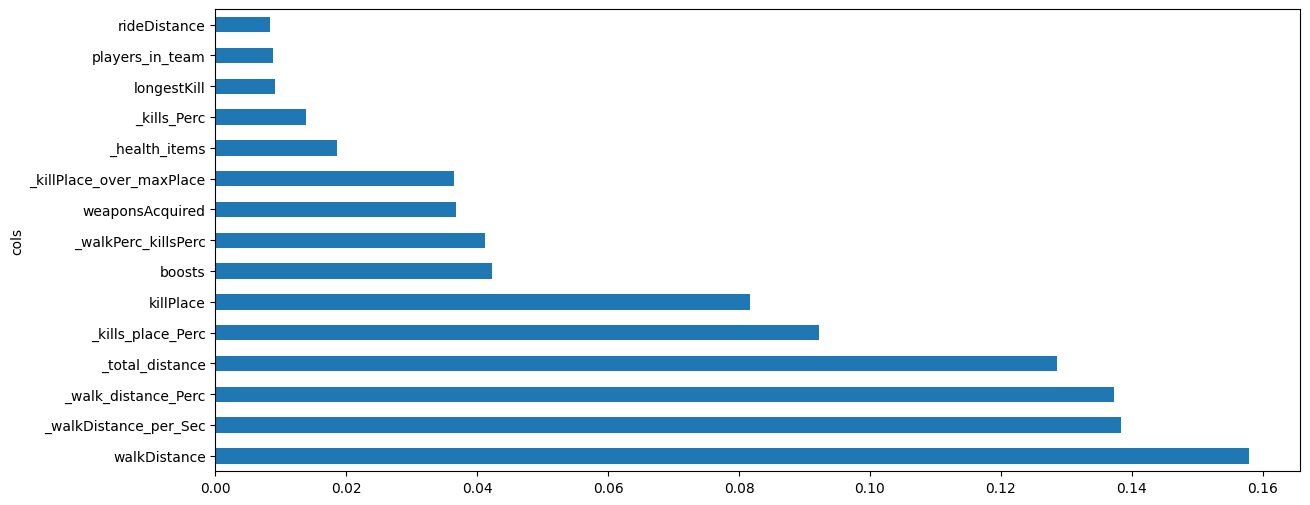

In [109]:
# Plot a feature importance graph for the 20 most important features

plot1 =  feat_imp[:15].plot('cols', 'imp', kind='barh', figsize=(14,6), legend= False)
plot1

In [110]:
x_train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'revives',
       'rideDistance', 'swimDistance', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', '_total_distance', '_headshot_rate',
       '_kill_without_moving', '_kills_Norm', '_damage_dealt_Norm',
       '_kills_Perc', '_kills_place_Perc', '_walk_distance_Perc',
       '_damage_dealt_Perc', '_walkPerc_killsPerc', 'players_in_team',
       '_health_items', '_killPlace_over_maxPlace', '_walkDistance_per_Sec',
       'matchType_Duo', 'matchType_Solo', 'matchType_Squad', 'groupId_cat',
       'matchId_cat'],
      dtype='object')

In [111]:
x_train.shape, y_train.shape

((44000, 35), (44000,))

In [112]:
# Keep only Signifiant Features
to_keep = feat_imp[feat_imp['imp'] > 0.005]['cols']
print(len(to_keep))

to_keep

18


14                walkDistance
29       _walkDistance_per_Sec
23         _walk_distance_Perc
16             _total_distance
22           _kills_place_Perc
6                    killPlace
1                       boosts
25         _walkPerc_killsPerc
15             weaponsAcquired
28    _killPlace_over_maxPlace
27               _health_items
21                 _kills_Perc
9                  longestKill
26             players_in_team
11                rideDistance
2                  damageDealt
20          _damage_dealt_Norm
19                 _kills_Norm
Name: cols, dtype: object

In [113]:
# Make DataFrame with only significant features

df_keep = x[to_keep].copy()

x_train, x_valid = split_vals(df_keep, n_trn)

In [114]:
# Building a Randim forest model with top features

rf_imp = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features= 'sqrt', n_jobs= -1)
rf_imp.fit(x_train, y_train)

print_score(rf_imp)

['mae train: ', 0.03157976502470495, 'mae val: ', 0.055140272675673896]


<Axes: ylabel='cols'>

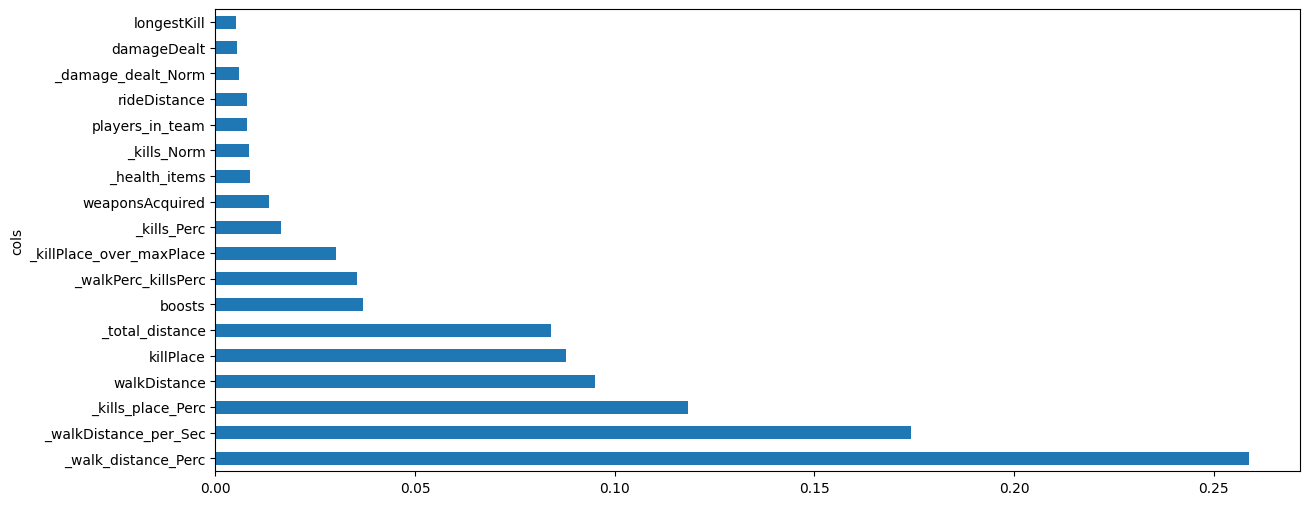

In [115]:
# Get Feature importance of our top features
feat_imp_to_keep = rf_feat_imp(rf_imp, df_keep)
plot2 = feat_imp_to_keep.plot('cols', 'imp', kind='barh', figsize=(14,6), legend= False)
plot2

[]

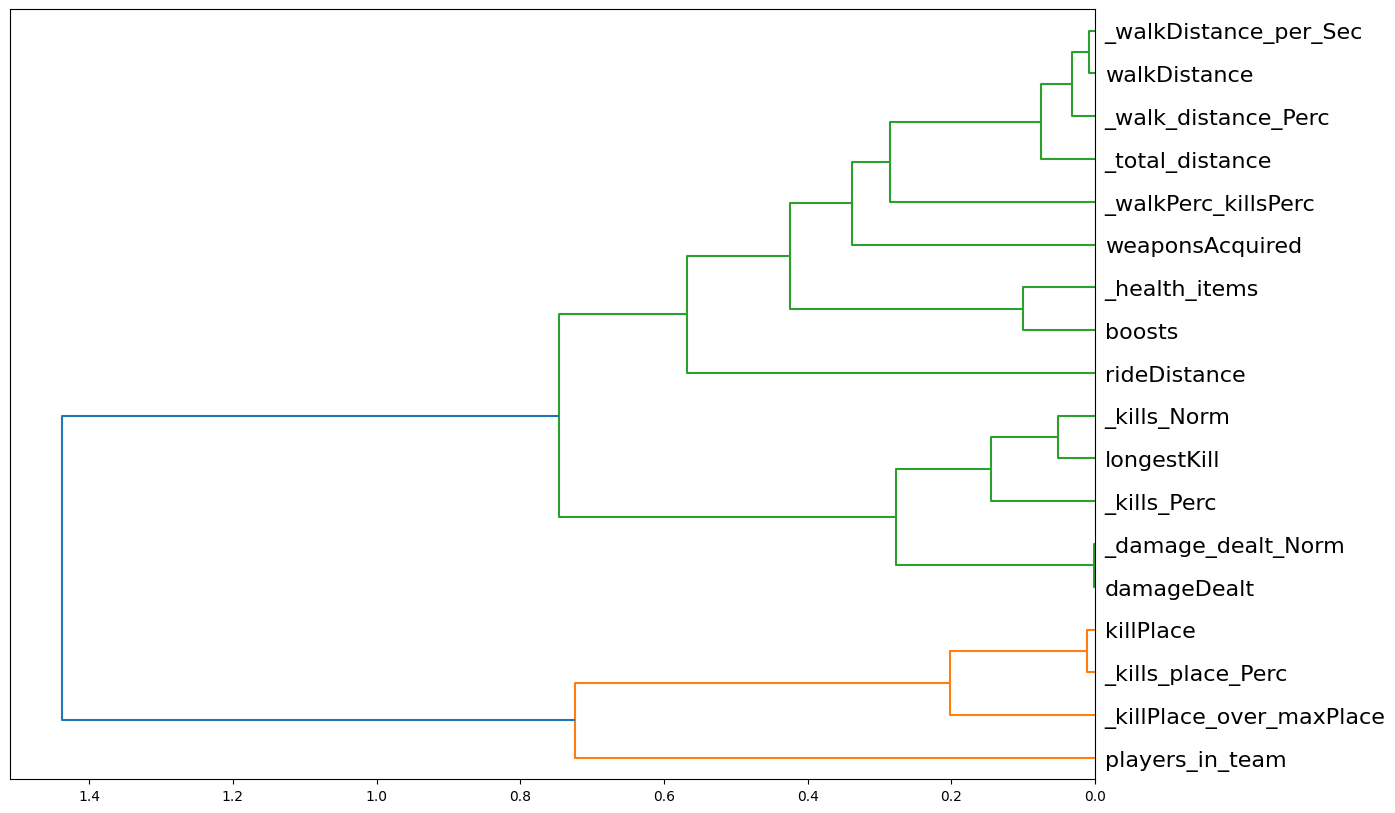

In [116]:
# Generating a Dendogram to view highly correlated features

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method =  'average')

fig = plt.figure(figsize= (14,10))
dendogram = hc.dendrogram(z, labels = df_keep.columns, orientation = 'left', leaf_font_size = 16)
plt.plot()

In [117]:
# Defining a function get_sample to get random sample of n rows from a dataframe(df), without replacement.

def get_sample(df, n):
    idxs= sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [118]:
# prepare data

train = df_hc.copy()

val_perc_full = 0.20     # % to use for validation set
n_valid_full = int(val_perc_full * len(train))
n_trn_full = len(train) - n_valid_full

df_full = train.drop(columns = ['winPlacePerc'])
y = train['winPlacePerc']

df_full = df_full[to_keep]      # Keeping only relevant features
x_train, x_valid = split_vals(df_full, n_trn_full)
y_train, y_valid = split_vals(y, n_trn_full)

# Check dimensions of data
print(f'Sample train shape: {x_train.shape}, Sample target shape: {y_train.shape}, Sample validation shape: {x_valid.shape}')

Sample train shape: (3227520, 18), Sample target shape: (3227520,), Sample validation shape: (806879, 18)


In [120]:
# Train Final model

rf_3 = RandomForestRegressor(n_estimators = 50, min_samples_leaf=3, max_features= 0.5, n_jobs= -1)
rf_3.fit(x_train, y_train)
print_score(rf_3)

['mae train: ', 0.025063474059468745, 'mae val: ', 0.046749943071559524]


In [121]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,_walkPerc_killsPerc,players_in_team,_health_items,_killPlace_over_maxPlace,_walkDistance_per_Sec,matchType_Duo,matchType_Solo,matchType_Squad,groupId_cat,matchId_cat
0,0,0,0.00,0,0,0,60,0,0,0.00,...,1.571429,4,0,2.142857,0.187443,False,False,True,587479,29996
1,0,0,91.47,0,0,0,57,0,0,0.00,...,2.177778,4,0,2.192308,0.806978,False,False,True,792470,32654
2,1,0,68.00,0,0,0,47,0,0,0.00,...,1.230769,2,0,0.940000,0.122762,True,False,False,807455,3131
3,0,0,32.90,0,0,0,75,0,0,0.00,...,0.840000,1,0,2.419355,0.141156,False,False,True,1283432,45133
4,0,0,100.00,0,0,0,45,1,1,58.53,...,0.276423,1,0,0.463918,0.034937,False,True,False,1683014,20468


###### Modifying the Test Data

In [122]:
%%time
df = pd.read_csv("S:\GitHub Projects\PUBG\Datasets\PUBG_Game_Prediction_data.csv")
reduce_mem_usage(df)

x = df.drop('winPlacePerc', axis = 1)
y = df[['winPlacePerc']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=11)

CPU times: total: 4.33 s
Wall time: 14.1 s


In [123]:
agg = x_test.groupby('groupId').size().to_frame('players_in_team')
x_test = x_test.merge(agg, how = 'left', on = ['groupId'])
x_test['_headshot_rate'] =  x_test['headshotKills'] / x_test['kills']
x_test['_headshot_rate'] =  x_test['_headshot_rate'].fillna(0)
x_test['_total_distance'] = x_test['rideDistance'] + x_test['walkDistance'] + x_test['swimDistance']
x_test['_players_joined'] = x_test.groupby('matchId')['matchId'].transform('count')
x_test['_kills_Norm'] = x_test['kills'] * ((100 - x_test['_players_joined']) / 100 + 1)
x_test['_damage_dealt_Norm'] = x_test['damageDealt'] * ((100 - x_test['_players_joined'])/100 + 1)
x_test['_health_items'] = x_test['heals'] + x_test['boosts']
x_test['_kill_without_moving'] = ((x_test['kills'] > 0) & (x_test['_total_distance'] == 0))
x_test['_kills_place_Perc'] = x_test['killPlace'].rank(pct=True).values
x_test['_kills_Perc'] = x_test['kills'].rank(pct=True).values
x_test['_walk_distance_Perc'] = x_test['walkDistance'].rank(pct=True).values
x_test['_killPlace_over_maxPlace'] = x_test['killPlace'] / x_test['maxPlace']
x_test['_walkDistance_per_Sec'] = x_test['walkDistance'] / x_test['matchDuration']
x_test['_walkPerc_killsPerc'] = x_test['_walk_distance_Perc'] / x_test['_kills_Perc']


In [124]:
y_train.head()

,winPlacePerc
971782,0.3871
303749,0.4400
718513,0.3404
3547657,0.7692
2295116,0.6250


In [125]:
# Turn groupId and matchId into categorical types
x_test['groupId'] = x_test['groupId'].astype('category')
x_test['matchId'] = x_test['matchId'].astype('category')

# Get category coding for groupId and matchId
x_test['groupId_cat'] = x_test['groupId'].cat.codes
x_test['matchId_cat'] = x_test['matchId'].cat.codes

In [126]:
# Remove irrelevant features from the test set
x_test_pred = x_test[to_keep].copy()

# Fill NaN with 0 (temporary)
x_test_pred.fillna(0, inplace= True)
x_test_pred.head()

,walkDistance,_walkDistance_per_Sec,_walk_distance_Perc,_total_distance,_kills_place_Perc,killPlace,boosts,_walkPerc_killsPerc,weaponsAcquired,_killPlace_over_maxPlace,_health_items,_kills_Perc,longestKill,players_in_team,rideDistance,damageDealt,_damage_dealt_Norm,_kills_Norm
0,30.07,0.022029,0.078581,30.07,0.943155,90,0,0.276416,0,3.103448,0,0.284286,0.0,3,0.0,0.0,0.000,0.00
1,3711.00,1.774749,0.969769,6116.00,0.231202,22,5,1.441199,5,0.846154,7,0.672891,141.8,2,2405.0,217.1,373.412,1.72
2,269.50,0.143504,0.342569,269.50,0.841728,80,0,1.205013,2,2.857143,0,0.284286,0.0,1,0.0,100.0,177.000,0.00
3,1237.00,0.965652,0.613773,1237.00,0.070490,7,0,0.674744,2,0.145833,0,0.909637,113.8,1,0.0,295.4,484.456,4.92
4,4070.00,2.190527,0.983101,4549.60,0.464333,44,2,3.458137,8,1.257143,3,0.284286,0.0,4,479.6,0.0,0.000,0.00


###### Predicting the final winPlacePerc

In [127]:
predictions = np.clip(a = rf_3.predict(x_test_pred), a_min= 0.0, a_max = 1.0)
pred_df = pd.DataFrame({'Id': x_test['Id'], 'winPlacePerc': predictions})
pred_df

# Create Submission file
pred_df.to_csv('S:\GitHub Projects\PUBG\Datasets\submission.csv', index= False)